# Business Macro Model - MAX

## Introduction
The goal of the model is to predict the rate of provision for credit losses as a function of economic variables.

The Data frequency is quarterly, between Q1/2020 - Q3/2020.

The Dataset consist of 4 main variable based on Bank ISRAEL reports and TEL-AVIV 125.

On 08/11/2022 we implement the validation comments that we get for development.

The comments included: using the difference as variable in prime and unemployment.

### good luck

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"]=30,5
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
df = pd.read_csv('C:\project\max\Database\QA_macro_model_database_business_sector.csv')
df

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,...,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,CB-LENSER-S-b,CB-LENSER-S-p,CB-BORRWER-S-b,CB-BORRWER-S-p,PROVISION-b,PROVISION-p,Dummy-t
0,31/03/1999,Mar-99,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,223.893274,NaN,227.748440,NaN,0.016927,NaN,0.0
1,30/06/1999,Jun-99,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,232.440980,NaN,236.259222,NaN,0.016161,NaN,0.0
2,30/09/1999,Sep-99,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012405,NaN,NaN,246.492654,NaN,250.444615,NaN,0.015780,NaN,0.0
3,31/12/1999,Dec-99,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004713,0.027965,NaN,258.887479,57.490091,263.019634,58.475290,0.015710,0.016848,0.0
4,31/03/2000,03/00,NaN,0.0,NaN,516.55,NaN,NaN,NaN,NaN,...,-0.012195,0.004771,0.015429,265.435111,58.442553,269.500308,59.522897,0.015084,0.018150,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,30/06/2021,Jun-21,NaN,0.0,0.060400,1764.58,1664.07,1568.09,1345.44,1325.23,...,0.007952,0.016026,0.017042,508.189897,145.994290,518.439616,148.789346,0.019770,0.018785,0.0
90,30/09/2021,Sep-21,NaN,0.0,0.053894,1859.68,1764.58,1664.07,1568.09,1345.44,...,0.008876,0.025044,0.025044,530.079225,147.395312,539.793030,150.045330,0.017995,0.017661,0.0
91,31/12/2021,Dec-21,NaN,0.0,0.105841,2056.51,1859.68,1764.58,1664.07,1568.09,...,0.002933,0.019881,0.028050,566.332249,150.954947,575.940853,153.558852,0.016683,0.016957,0.0
92,31/03/2022,Mar-22,NaN,0.0,0.019742,2097.11,2056.51,1859.68,1764.58,1664.07,...,0.014620,0.026627,0.034791,597.156897,152.417201,607.552634,155.343450,0.017111,0.018837,0.0


In [3]:
# Cutting relevant rows
df = df[10:85]
df

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,...,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,CB-LENSER-S-b,CB-LENSER-S-p,CB-BORRWER-S-b,CB-BORRWER-S-p,PROVISION-b,PROVISION-p,Dummy-t
10,30/09/2001,09-Jan,382.718750,0.00,-0.127835,360.37,413.19,382.13,489.25,559.16,...,0.008885,0.020083,0.024890,329.392437,62.223689,335.499475,63.077208,0.018203,0.013531,0.0
11,31/12/2001,12-Jan,408.633182,0.00,0.239809,446.79,360.37,413.19,382.13,489.25,...,-0.005871,0.019057,0.014094,333.214493,63.330646,339.905723,64.056031,0.019686,0.011324,0.0
12,31/03/2002,03-Feb,403.660000,-0.01,-0.151234,379.22,446.79,360.37,413.19,382.13,...,0.023622,0.026654,0.043129,344.536155,62.641214,351.664207,63.423187,0.020269,0.012329,1.0
13,30/06/2002,06-Feb,361.228095,-0.11,-0.057566,357.39,379.22,446.79,360.37,413.19,...,0.038462,0.056751,0.066140,352.344726,64.402108,360.134783,65.180892,0.021631,0.011948,1.0
14,30/09/2002,09-Feb,351.967895,-0.03,-0.057752,336.75,357.39,379.22,446.79,360.37,...,0.006481,0.069882,0.063601,357.899297,65.975365,366.374508,66.726821,0.023133,0.011262,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,31/03/2019,Mar-19,1417.974000,0.00,0.063645,1418.03,1333.18,1484.82,1362.60,1310.48,...,0.005010,0.004018,0.014028,445.453468,154.286196,451.832262,157.162153,0.014118,0.018299,0.0
81,30/06/2019,Jun-19,1447.851500,0.00,0.047340,1485.16,1418.03,1333.18,1484.82,1362.60,...,0.003972,0.006020,0.008006,447.319850,153.996524,454.107575,156.690843,0.014947,0.017195,0.0
82,30/09/2019,Sep-19,1505.308421,0.00,0.031916,1532.56,1485.16,1418.03,1333.18,1484.82,...,-0.002967,0.006008,0.003034,451.050879,154.450300,457.787291,157.168266,0.014715,0.017293,0.0
83,31/12/2019,Dec-19,1612.222174,0.00,0.054902,1616.70,1532.56,1485.16,1418.03,1333.18,...,0.000000,0.000993,0.006008,453.426610,152.701505,460.928528,155.423007,0.016276,0.017510,0.0


### Exploring & Cleaning Dataset

In [4]:
df.columns

Index(['Index', 'Quarter', 'TA125', 'D3-125', 'P-CHANGE125', 'TA-125-CLOSE',
       'TA125-LAG1', 'TA125-LAG2', 'TA125-LAG3', 'TA125-LAG4', 'TA125-LAG1-R',
       'TA125-LAG2-R', 'TA125-LAG3-R', 'TA125-LAG4-R', 'UNEMP', 'UNEMP-LAG1',
       'UNEMP-LAG2', 'UNEMP-LAG3', 'UNEMP-LAG4', 'UNEMP-LAG1-DIFF',
       'UNEMP-LAG2-DIFF', 'UNEMP-LAG3-DIFF', 'UNEMP-LAG4-DIFF', 'GDP',
       'GDP-LAG1', 'GDP-LAG2', 'GDP-LAG3', 'GDP-LAG4', 'GDP-LAG1-R',
       'GDP-LAG2-R', 'GDP-LAG3-R', 'GDP-LAG4-R', 'Prime', 'Prime-LAG1',
       'Prime-LAG2', 'Prime-LAG3', 'Prime-LAG4', 'Prime-LAG1-DIFF',
       'Prime-LAG2-DIFF', 'Prime-LAG3-DIFF', 'Prime-LAG4-DIFF', 'CP-I',
       'CP-I-LAG1', 'CP-I-LAG2', 'CP-I-LAG3', 'CP-I-LAG4', 'CP-I-LAG1-R',
       'CP-I-LAG2-R', 'CP-I-LAG3-R', 'CP-I-LAG4-R', 'CB-LENSER-S-b',
       'CB-LENSER-S-p', 'CB-BORRWER-S-b', 'CB-BORRWER-S-p', 'PROVISION-b',
       'PROVISION-p', 'Dummy-t'],
      dtype='object')

In [5]:
df.head()

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,...,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,CB-LENSER-S-b,CB-LENSER-S-p,CB-BORRWER-S-b,CB-BORRWER-S-p,PROVISION-b,PROVISION-p,Dummy-t
10,30/09/2001,09-Jan,382.718750,0.00,-0.127835,360.37,413.19,382.13,489.25,559.16,...,0.008885,0.020083,0.024890,329.392437,62.223689,335.499475,63.077208,0.018203,0.013531,0.0
11,31/12/2001,12-Jan,408.633182,0.00,0.239809,446.79,360.37,413.19,382.13,489.25,...,-0.005871,0.019057,0.014094,333.214493,63.330646,339.905723,64.056031,0.019686,0.011324,0.0
12,31/03/2002,03-Feb,403.660000,-0.01,-0.151234,379.22,446.79,360.37,413.19,382.13,...,0.023622,0.026654,0.043129,344.536155,62.641214,351.664207,63.423187,0.020269,0.012329,1.0
13,30/06/2002,06-Feb,361.228095,-0.11,-0.057566,357.39,379.22,446.79,360.37,413.19,...,0.038462,0.056751,0.066140,352.344726,64.402108,360.134783,65.180892,0.021631,0.011948,1.0
14,30/09/2002,09-Feb,351.967895,-0.03,-0.057752,336.75,357.39,379.22,446.79,360.37,...,0.006481,0.069882,0.063601,357.899297,65.975365,366.374508,66.726821,0.023133,0.011262,1.0


In [6]:
df.tail()

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,...,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,CB-LENSER-S-b,CB-LENSER-S-p,CB-BORRWER-S-b,CB-BORRWER-S-p,PROVISION-b,PROVISION-p,Dummy-t
80,31/03/2019,Mar-19,1417.974000,0.00,0.063645,1418.03,1333.18,1484.82,1362.60,1310.48,...,0.005010,0.004018,0.014028,445.453468,154.286196,451.832262,157.162153,0.014118,0.018299,0.0
81,30/06/2019,Jun-19,1447.851500,0.00,0.047340,1485.16,1418.03,1333.18,1484.82,1362.60,...,0.003972,0.006020,0.008006,447.319850,153.996524,454.107575,156.690843,0.014947,0.017195,0.0
82,30/09/2019,Sep-19,1505.308421,0.00,0.031916,1532.56,1485.16,1418.03,1333.18,1484.82,...,-0.002967,0.006008,0.003034,451.050879,154.450300,457.787291,157.168266,0.014715,0.017293,0.0
83,31/12/2019,Dec-19,1612.222174,0.00,0.054902,1616.70,1532.56,1485.16,1418.03,1333.18,...,0.000000,0.000993,0.006008,453.426610,152.701505,460.928528,155.423007,0.016276,0.017510,0.0
84,31/03/2020,Mar-20,1270.834762,-0.21,-0.210194,1276.88,1616.70,1532.56,1485.16,1418.03,...,-0.000992,-0.003956,0.000000,470.752662,148.370796,480.102452,151.375373,0.019475,0.019849,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 10 to 84
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            75 non-null     object 
 1   Quarter          75 non-null     object 
 2   TA125            75 non-null     float64
 3   D3-125           75 non-null     float64
 4   P-CHANGE125      75 non-null     float64
 5   TA-125-CLOSE     75 non-null     float64
 6   TA125-LAG1       75 non-null     float64
 7   TA125-LAG2       75 non-null     float64
 8   TA125-LAG3       75 non-null     float64
 9   TA125-LAG4       75 non-null     float64
 10  TA125-LAG1-R     75 non-null     float64
 11  TA125-LAG2-R     75 non-null     float64
 12  TA125-LAG3-R     75 non-null     float64
 13  TA125-LAG4-R     75 non-null     float64
 14  UNEMP            75 non-null     float64
 15  UNEMP-LAG1       75 non-null     float64
 16  UNEMP-LAG2       75 non-null     float64
 17  UNEMP-LAG3       

In [8]:
len(df)

75

In [9]:
df.columns

Index(['Index', 'Quarter', 'TA125', 'D3-125', 'P-CHANGE125', 'TA-125-CLOSE',
       'TA125-LAG1', 'TA125-LAG2', 'TA125-LAG3', 'TA125-LAG4', 'TA125-LAG1-R',
       'TA125-LAG2-R', 'TA125-LAG3-R', 'TA125-LAG4-R', 'UNEMP', 'UNEMP-LAG1',
       'UNEMP-LAG2', 'UNEMP-LAG3', 'UNEMP-LAG4', 'UNEMP-LAG1-DIFF',
       'UNEMP-LAG2-DIFF', 'UNEMP-LAG3-DIFF', 'UNEMP-LAG4-DIFF', 'GDP',
       'GDP-LAG1', 'GDP-LAG2', 'GDP-LAG3', 'GDP-LAG4', 'GDP-LAG1-R',
       'GDP-LAG2-R', 'GDP-LAG3-R', 'GDP-LAG4-R', 'Prime', 'Prime-LAG1',
       'Prime-LAG2', 'Prime-LAG3', 'Prime-LAG4', 'Prime-LAG1-DIFF',
       'Prime-LAG2-DIFF', 'Prime-LAG3-DIFF', 'Prime-LAG4-DIFF', 'CP-I',
       'CP-I-LAG1', 'CP-I-LAG2', 'CP-I-LAG3', 'CP-I-LAG4', 'CP-I-LAG1-R',
       'CP-I-LAG2-R', 'CP-I-LAG3-R', 'CP-I-LAG4-R', 'CB-LENSER-S-b',
       'CB-LENSER-S-p', 'CB-BORRWER-S-b', 'CB-BORRWER-S-p', 'PROVISION-b',
       'PROVISION-p', 'Dummy-t'],
      dtype='object')

In [10]:
PROVISION_P = pd.DataFrame()
DISPLAY_PROVISION_P = pd.DataFrame()
PROVISION_P = df['PROVISION-p']
DISPLAY_PROVISION_P = df[['PROVISION-p','Index']]

### Drop Credit Balance columns

In [11]:
df = df.drop(labels= ['CB-LENSER-S-b','CB-LENSER-S-p','CB-BORRWER-S-b','CB-BORRWER-S-p','PROVISION-p'], axis= 1)

### Some Statistic

In [12]:
df.describe()

,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,TA125-LAG1-R,TA125-LAG2-R,...,CP-I-LAG1,CP-I-LAG2,CP-I-LAG3,CP-I-LAG4,CP-I-LAG1-R,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,PROVISION-b,Dummy-t
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,996.255492,-0.024133,0.020764,996.429067,984.913200,968.452267,954.541467,942.194800,0.020764,0.045298,...,91.260381,90.920661,90.585836,90.242308,0.003722,0.003722,0.011618,0.015659,0.023222,0.200000
std,342.175644,0.054775,0.106053,341.888630,346.824762,345.729538,343.708779,341.011633,0.106053,0.146310,...,8.319838,8.456588,8.568634,8.669571,0.009293,0.009293,0.017459,0.020325,0.006615,0.402694
min,335.584286,-0.310000,-0.298230,332.450000,332.450000,332.450000,332.450000,332.450000,-0.298230,-0.428775,...,76.223380,75.019457,75.019457,75.019457,-0.012968,-0.012968,-0.026445,-0.027424,0.013816,0.000000
25%,769.293030,-0.020000,-0.035335,773.580000,709.865000,665.390000,660.560000,646.215000,-0.035335,-0.037180,...,82.595202,82.434479,82.210189,81.920494,-0.002641,-0.002641,0.000496,0.000000,0.017715,0.000000
50%,1053.438235,0.000000,0.031916,1064.980000,1054.580000,1049.060000,1032.480000,994.500000,0.031916,0.037477,...,93.982040,92.842332,92.228643,91.790294,0.001000,0.001000,0.009615,0.012935,0.020959,0.000000
75%,1271.848095,0.000000,0.072659,1279.625000,1272.080000,1257.370000,1252.245000,1250.865000,0.072659,0.116064,...,98.961640,98.913380,98.913380,98.862926,0.010082,0.010082,0.020821,0.028868,0.029601,0.000000
max,1612.222174,0.000000,0.326934,1616.700000,1616.700000,1532.560000,1485.160000,1484.820000,0.326934,0.420447,...,100.797605,100.797605,100.797605,100.398801,0.038462,0.038462,0.069882,0.066140,0.033342,1.000000


# Visualisation of the data

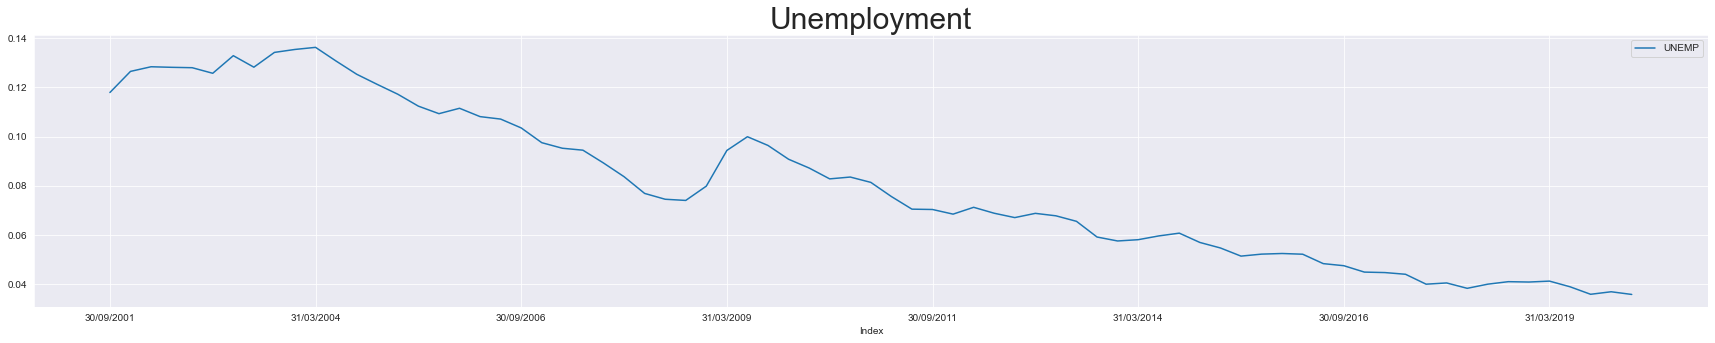

In [13]:
display = df[['UNEMP','Index']]
display.plot(x="Index", y='UNEMP')
plt.title('Unemployment',fontdict={'fontsize':30});

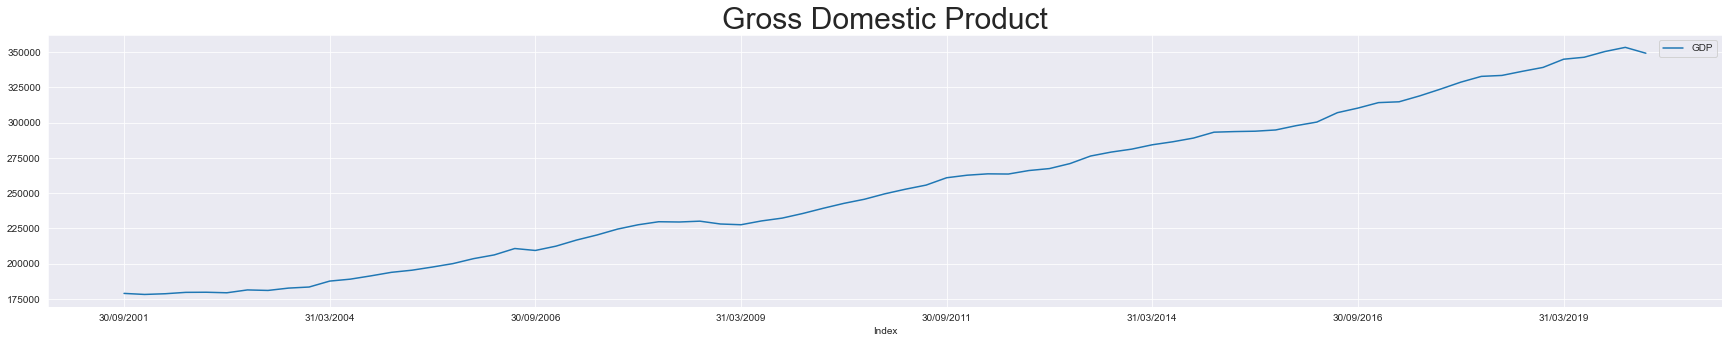

In [14]:
display = df[['GDP','Index']]
display.plot(x="Index", y='GDP')
plt.title('Gross Domestic Product',fontdict={'fontsize':30});

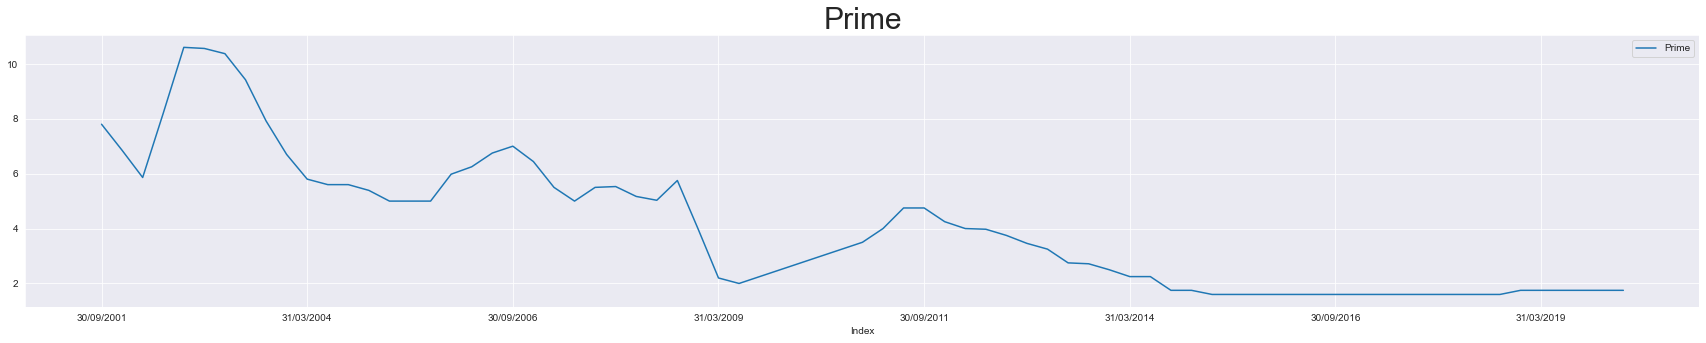

In [15]:
display = df[['Prime','Index']]
display.plot(x="Index", y='Prime')
plt.title('Prime',fontdict={'fontsize':30});

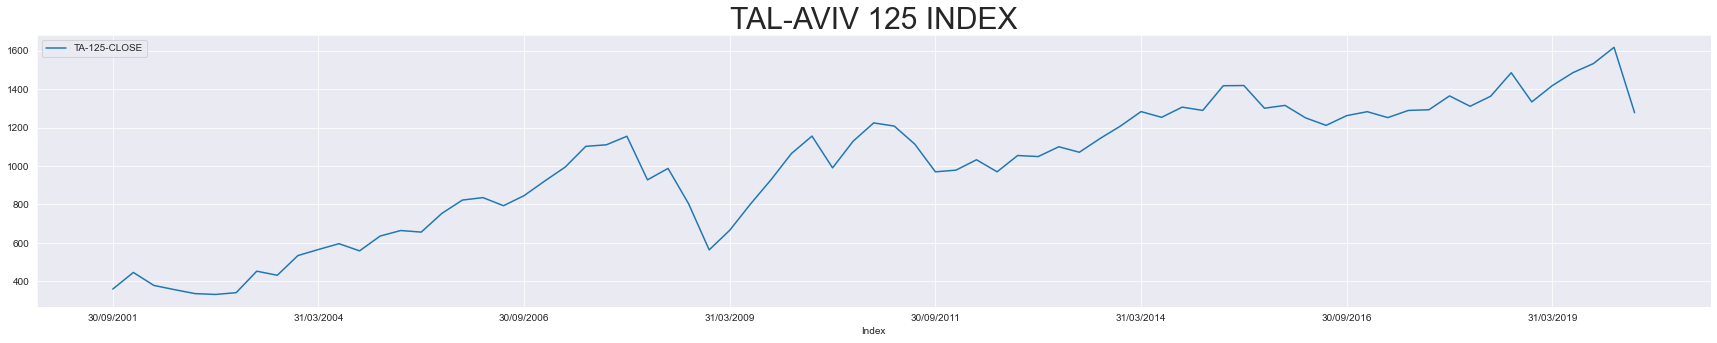

In [16]:
display = df[['TA-125-CLOSE','Index']]
display.plot(x="Index", y='TA-125-CLOSE')
plt.title('TAL-AVIV 125 INDEX',fontdict={'fontsize':30});

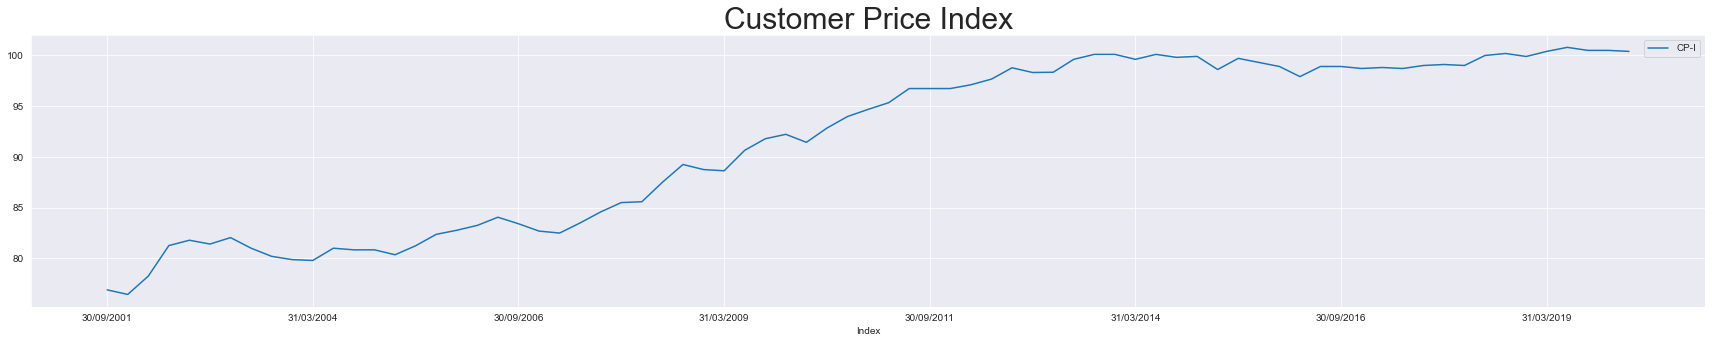

In [17]:
display = df[['CP-I','Index']]
display.plot(x="Index", y='CP-I')
plt.title('Customer Price Index',fontdict={'fontsize':30});

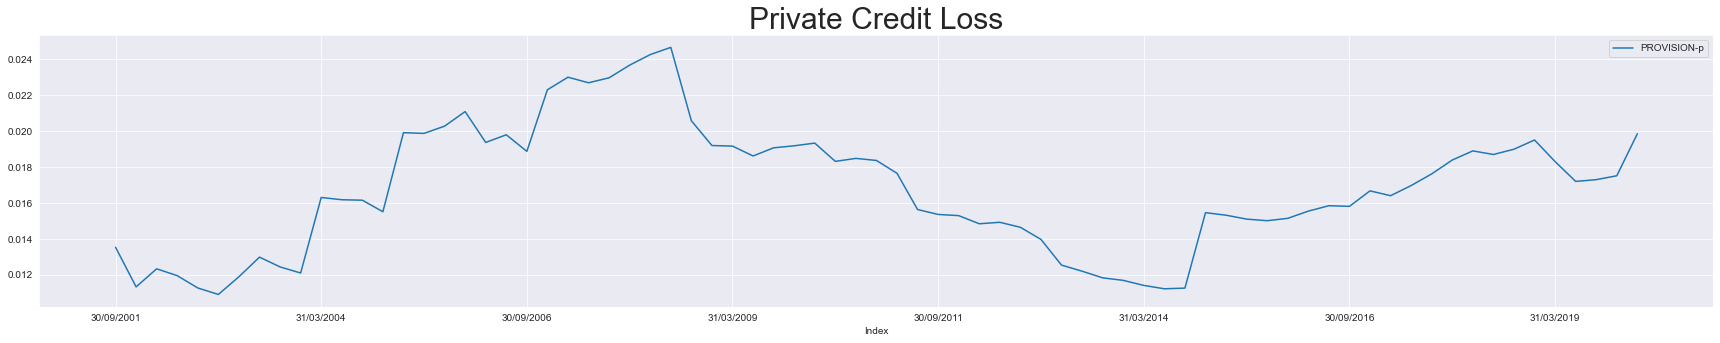

In [18]:
DISPLAY_PROVISION_P.plot(x="Index", y='PROVISION-p')
plt.title('Private Credit Loss',fontdict={'fontsize':30});

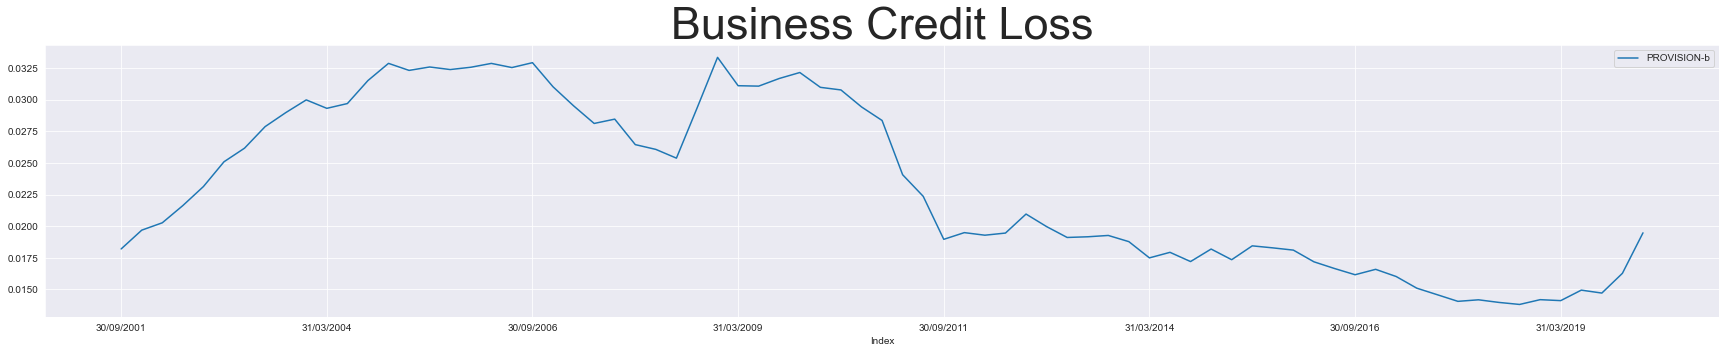

In [19]:
display = df[['PROVISION-b','Index']]
display.plot(x="Index", y='PROVISION-b')
plt.title('Business Credit Loss',fontdict={'fontsize':45});

### RECAP and Insights

As you can see in the dependent variable “PROVISION-b” between the years 2002 - 2011 (12-50 indexes) the credit loss increases without a big change in the X variables. 

The reason behind this could be the background of the"dotcom" and “subprime” crisis and the housing protest in ISRAEL 2011.
In addition, should be noted that the PROVISION as a dependet variable contains human judgment and business decision, therefore it is recommended to test an explained variable that is NOT subject to human jugment like “failure” I tried to handel it with Dummy variable (number 1 for crisis time, else 0)

We can see on that the prime graph flat from 64 index(2015-2022), and this because Bank ISRAEL decision (Prime aims for zero) We should take it carefully and I used in Dummy variable to handle it (number 1 for 2015-2022, else 0)

# The Model
### Correlation & selection
After try using different methods ,I used in Backward Elimination method and lowest correlation. 

My significance level to stay in the Model is SL=0.05

The process is:
1. Fit the model
2. Remove the var whit highest P_value > 0.05 and go to 1
3. Remove var whit highest corr to another & lowest correlation to y (provision)
4. keep the R-squared > 0.6

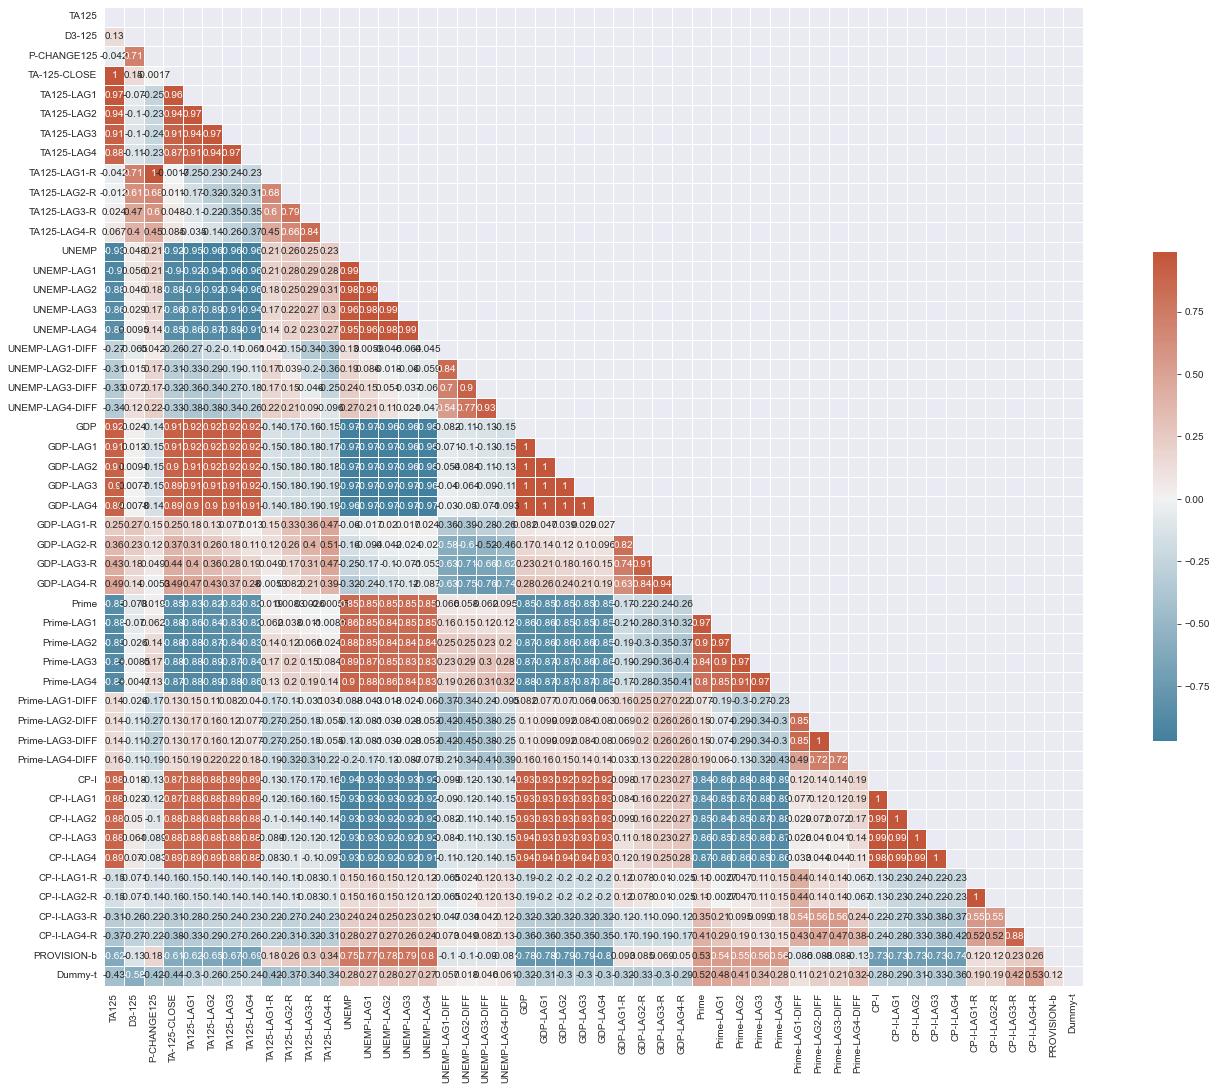

In [20]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

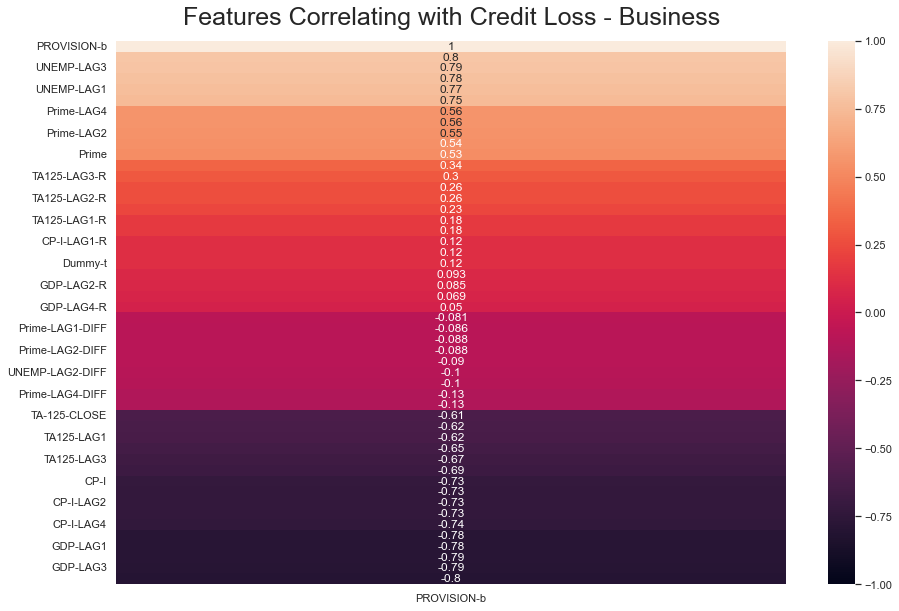

In [21]:
sns.set(rc={'figure.figsize':(15,10)})
heatmap = sns.heatmap(df.corr()[['PROVISION-b']].sort_values(by='PROVISION-b', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Credit Loss - Business', fontdict={'fontsize':25}, pad=16)
plt.yticks(rotation=0)
plt.show()

# Preprocess
### split the data

In [22]:
x_var = df.iloc[:,2 :-2]
x_dummy = df.iloc[:,-1 :]
y_provision = df.iloc[:,-2 :-1]
x = pd.concat([x_var,x_dummy],axis=1,join='inner')

In [23]:
x_columns = x.columns
x_columns

Index(['TA125', 'D3-125', 'P-CHANGE125', 'TA-125-CLOSE', 'TA125-LAG1',
       'TA125-LAG2', 'TA125-LAG3', 'TA125-LAG4', 'TA125-LAG1-R',
       'TA125-LAG2-R', 'TA125-LAG3-R', 'TA125-LAG4-R', 'UNEMP', 'UNEMP-LAG1',
       'UNEMP-LAG2', 'UNEMP-LAG3', 'UNEMP-LAG4', 'UNEMP-LAG1-DIFF',
       'UNEMP-LAG2-DIFF', 'UNEMP-LAG3-DIFF', 'UNEMP-LAG4-DIFF', 'GDP',
       'GDP-LAG1', 'GDP-LAG2', 'GDP-LAG3', 'GDP-LAG4', 'GDP-LAG1-R',
       'GDP-LAG2-R', 'GDP-LAG3-R', 'GDP-LAG4-R', 'Prime', 'Prime-LAG1',
       'Prime-LAG2', 'Prime-LAG3', 'Prime-LAG4', 'Prime-LAG1-DIFF',
       'Prime-LAG2-DIFF', 'Prime-LAG3-DIFF', 'Prime-LAG4-DIFF', 'CP-I',
       'CP-I-LAG1', 'CP-I-LAG2', 'CP-I-LAG3', 'CP-I-LAG4', 'CP-I-LAG1-R',
       'CP-I-LAG2-R', 'CP-I-LAG3-R', 'CP-I-LAG4-R', 'Dummy-t'],
      dtype='object')

In [24]:
x_columns = ['TA125', 'D3-125', 'P-CHANGE125', 'TA-125-CLOSE', 'TA125-LAG1',
             'TA125-LAG2', 'TA125-LAG3', 'TA125-LAG4', 'TA125-LAG1-R',
             'TA125-LAG2-R', 'TA125-LAG3-R', 'TA125-LAG4-R', 'UNEMP', 'UNEMP-LAG1',
             'UNEMP-LAG2', 'UNEMP-LAG3', 'UNEMP-LAG4', 'UNEMP-LAG1-DIFF',
             'UNEMP-LAG2-DIFF', 'UNEMP-LAG3-DIFF', 'UNEMP-LAG4-DIFF', 'GDP',
             'GDP-LAG1', 'GDP-LAG2', 'GDP-LAG3', 'GDP-LAG4', 'GDP-LAG1-R',
             'GDP-LAG2-R', 'GDP-LAG3-R', 'GDP-LAG4-R', 'Prime', 'Prime-LAG1',
             'Prime-LAG2', 'Prime-LAG3', 'Prime-LAG4', 'Prime-LAG1-DIFF',
             'Prime-LAG2-DIFF', 'Prime-LAG3-DIFF', 'Prime-LAG4-DIFF', 'CP-I',
             'CP-I-LAG1', 'CP-I-LAG2', 'CP-I-LAG3', 'CP-I-LAG4', 'CP-I-LAG1-R',
             'CP-I-LAG2-R', 'CP-I-LAG3-R', 'CP-I-LAG4-R', 'Dummy-t']

# Build the model


In [25]:
def set_lr():
    """
    this function run the regression model and print the features sort by p-value
    :return:
    tow things:
        1.the result of the regression
        2.list of the features
    """

    # 1.the result of the regression
    x = df[x_columns]
    x = sm.add_constant(x)
    result = sm.OLS(y_provision,x).fit()
    print(result.summary())

    # 2.list of the features
    d = {}
    for i in x.columns.tolist():
        d[f'{i}'] = result.pvalues[i]
    
    df_pvalue= pd.DataFrame(d.items(), columns=['Var_name', 'p-Value']).sort_values(['p-Value'],ascending=[False]).reset_index(drop=True)
    print(df_pvalue)
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     19.29
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           8.80e-15
Time:                        22:46:35   Log-Likelihood:                 387.21
No. Observations:                  75   AIC:                            -694.4
Df Residuals:                      35   BIC:                            -601.7
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0692      0.027     

### Remove columns with p_value > 0.05

In [26]:
x_columns.remove('GDP-LAG1')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     20.37
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.92e-15
Time:                        22:46:35   Log-Likelihood:                 387.21
No. Observations:                  75   AIC:                            -696.4
Df Residuals:                      36   BIC:                            -606.0
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0692      0.026     

In [27]:
x_columns.remove('CP-I-LAG4')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     21.50
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.08e-16
Time:                        22:46:35   Log-Likelihood:                 387.21
No. Observations:                  75   AIC:                            -698.4
Df Residuals:                      37   BIC:                            -610.4
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0695      0.025     

In [28]:
x_columns.remove('CP-I-LAG3-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     22.69
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           8.45e-17
Time:                        22:46:35   Log-Likelihood:                 387.21
No. Observations:                  75   AIC:                            -700.4
Df Residuals:                      38   BIC:                            -614.7
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0686      0.021     

In [29]:
x_columns.remove('UNEMP-LAG1')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     22.69
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           8.45e-17
Time:                        22:46:35   Log-Likelihood:                 387.21
No. Observations:                  75   AIC:                            -700.4
Df Residuals:                      38   BIC:                            -614.7
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0686      0.021     

In [30]:
x_columns.remove('UNEMP-LAG2-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     22.69
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           8.45e-17
Time:                        22:46:35   Log-Likelihood:                 387.21
No. Observations:                  75   AIC:                            -700.4
Df Residuals:                      38   BIC:                            -614.7
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0686      0.021     

In [31]:
x_columns.remove('UNEMP-LAG2')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     23.95
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.70e-17
Time:                        22:46:35   Log-Likelihood:                 387.20
No. Observations:                  75   AIC:                            -702.4
Df Residuals:                      39   BIC:                            -619.0
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0687      0.020     

In [32]:
x_columns.remove('CP-I-LAG2')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     25.28
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.35e-18
Time:                        22:46:35   Log-Likelihood:                 387.19
No. Observations:                  75   AIC:                            -704.4
Df Residuals:                      40   BIC:                            -623.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0686      0.020     

In [33]:
x_columns.remove('UNEMP-LAG3-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     25.28
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.35e-18
Time:                        22:46:35   Log-Likelihood:                 387.19
No. Observations:                  75   AIC:                            -704.4
Df Residuals:                      40   BIC:                            -623.3
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0686      0.020     

In [34]:
x_columns.remove('TA125')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     26.68
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           6.46e-19
Time:                        22:46:35   Log-Likelihood:                 387.17
No. Observations:                  75   AIC:                            -706.3
Df Residuals:                      41   BIC:                            -627.5
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0690      0.020     

In [35]:
x_columns.remove('TA125-LAG2-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     28.15
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.22e-19
Time:                        22:46:36   Log-Likelihood:                 387.13
No. Observations:                  75   AIC:                            -708.3
Df Residuals:                      42   BIC:                            -631.8
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0685      0.019     

In [36]:
x_columns.remove('UNEMP')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     28.15
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.22e-19
Time:                        22:46:36   Log-Likelihood:                 387.13
No. Observations:                  75   AIC:                            -708.3
Df Residuals:                      42   BIC:                            -631.8
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0685      0.019     

In [37]:
x_columns.remove('UNEMP-LAG4')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     29.74
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.22e-20
Time:                        22:46:36   Log-Likelihood:                 387.12
No. Observations:                  75   AIC:                            -710.2
Df Residuals:                      43   BIC:                            -636.1
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0677      0.018     

In [38]:
x_columns.remove('UNEMP-LAG1-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     31.40
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.04e-21
Time:                        22:46:36   Log-Likelihood:                 387.06
No. Observations:                  75   AIC:                            -712.1
Df Residuals:                      44   BIC:                            -640.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0687      0.017     

In [39]:
x_columns.remove('Prime-LAG1')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     31.40
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.04e-21
Time:                        22:46:36   Log-Likelihood:                 387.06
No. Observations:                  75   AIC:                            -712.1
Df Residuals:                      44   BIC:                            -640.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0687      0.017     

In [40]:
x_columns.remove('Prime-LAG1-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     33.13
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           7.28e-22
Time:                        22:46:36   Log-Likelihood:                 386.97
No. Observations:                  75   AIC:                            -713.9
Df Residuals:                      45   BIC:                            -644.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0704      0.017     

In [41]:
x_columns.remove('TA125-LAG3')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     34.93
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.32e-22
Time:                        22:46:36   Log-Likelihood:                 386.82
No. Observations:                  75   AIC:                            -715.6
Df Residuals:                      46   BIC:                            -648.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0705      0.016     

In [42]:
x_columns.remove('CP-I-LAG4-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     36.88
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.31e-23
Time:                        22:46:36   Log-Likelihood:                 386.69
No. Observations:                  75   AIC:                            -717.4
Df Residuals:                      47   BIC:                            -652.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0723      0.016     

In [43]:
x_columns.remove('Dummy-t')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     38.82
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.31e-24
Time:                        22:46:36   Log-Likelihood:                 386.42
No. Observations:                  75   AIC:                            -718.8
Df Residuals:                      48   BIC:                            -656.3
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0745      0.015     

In [44]:
x_columns.remove('UNEMP-LAG3')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     41.00
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           7.42e-25
Time:                        22:46:36   Log-Likelihood:                 386.24
No. Observations:                  75   AIC:                            -720.5
Df Residuals:                      49   BIC:                            -660.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0806      0.008     

In [45]:
x_columns.remove('GDP-LAG3-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     43.17
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.38e-25
Time:                        22:46:36   Log-Likelihood:                 385.89
No. Observations:                  75   AIC:                            -721.8
Df Residuals:                      50   BIC:                            -663.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0805      0.008     

In [46]:
x_columns.remove('GDP-LAG3')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     45.88
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.07e-26
Time:                        22:46:36   Log-Likelihood:                 385.84
No. Observations:                  75   AIC:                            -723.7
Df Residuals:                      51   BIC:                            -668.1
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0805      0.008     

In [47]:
x_columns.remove('GDP-LAG2-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     48.01
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.56e-27
Time:                        22:46:36   Log-Likelihood:                 385.18
No. Observations:                  75   AIC:                            -724.4
Df Residuals:                      52   BIC:                            -671.1
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0821      0.008     

In [48]:
x_columns.remove('GDP-LAG2')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     51.19
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           6.50e-28
Time:                        22:46:36   Log-Likelihood:                 385.13
No. Observations:                  75   AIC:                            -726.3
Df Residuals:                      53   BIC:                            -675.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0823      0.008     

In [49]:
x_columns.remove('Prime-LAG3')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     53.75
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.39e-28
Time:                        22:46:36   Log-Likelihood:                 384.46
No. Observations:                  75   AIC:                            -726.9
Df Residuals:                      54   BIC:                            -678.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0811      0.008     

In [50]:
x_columns.remove('Prime-LAG2')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     53.75
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.39e-28
Time:                        22:46:36   Log-Likelihood:                 384.46
No. Observations:                  75   AIC:                            -726.9
Df Residuals:                      54   BIC:                            -678.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0811      0.008     

In [51]:
x_columns.remove('TA125-LAG3-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     55.51
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.69e-29
Time:                        22:46:37   Log-Likelihood:                 383.13
No. Observations:                  75   AIC:                            -726.3
Df Residuals:                      55   BIC:                            -679.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0808      0.008     

In [52]:
x_columns.remove('TA125-LAG1-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     55.51
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.69e-29
Time:                        22:46:37   Log-Likelihood:                 383.13
No. Observations:                  75   AIC:                            -726.3
Df Residuals:                      55   BIC:                            -679.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0808      0.008     

In [53]:
x_columns.remove('P-CHANGE125')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     57.85
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.34e-29
Time:                        22:46:37   Log-Likelihood:                 382.03
No. Observations:                  75   AIC:                            -726.1
Df Residuals:                      56   BIC:                            -682.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0800      0.008     

In [54]:
x_columns.remove('TA125-LAG4')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     60.31
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.02e-30
Time:                        22:46:37   Log-Likelihood:                 380.85
No. Observations:                  75   AIC:                            -725.7
Df Residuals:                      57   BIC:                            -684.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0794      0.008     

In [55]:
x_columns.remove('TA125-LAG4-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.80e-30
Time:                        22:46:37   Log-Likelihood:                 379.14
No. Observations:                  75   AIC:                            -724.3
Df Residuals:                      58   BIC:                            -684.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0800      0.008     

In [56]:
x_columns.remove('Prime-LAG4-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.80e-30
Time:                        22:46:37   Log-Likelihood:                 379.14
No. Observations:                  75   AIC:                            -724.3
Df Residuals:                      58   BIC:                            -684.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0800      0.008     

In [57]:
x_columns.remove('Prime-LAG3-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.80e-30
Time:                        22:46:37   Log-Likelihood:                 379.14
No. Observations:                  75   AIC:                            -724.3
Df Residuals:                      58   BIC:                            -684.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0800      0.008     

In [58]:
x_columns.remove('Prime-LAG2-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     64.39
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           7.58e-31
Time:                        22:46:37   Log-Likelihood:                 377.51
No. Observations:                  75   AIC:                            -723.0
Df Residuals:                      59   BIC:                            -685.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0816      0.008     

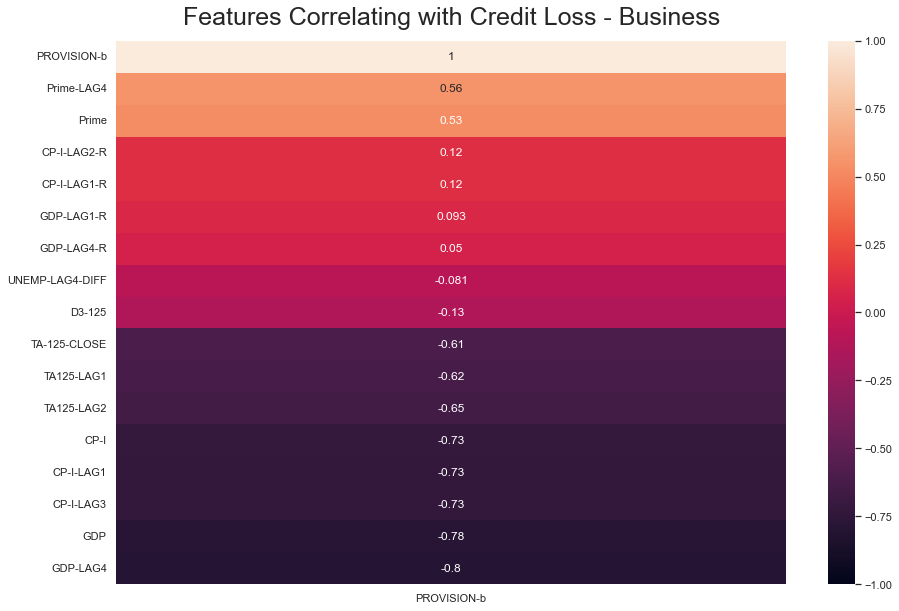

In [59]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z

sns.set(rc={'figure.figsize': (15, 10)})
heatmap = sns.heatmap(z.corr()[['PROVISION-b']].sort_values(by='PROVISION-b', ascending=False), vmin=-1, vmax=1,
                      annot=True)
heatmap.set_title('Features Correlating with Credit Loss - Business', fontdict={'fontsize': 25}, pad=16)
plt.yticks(rotation=0)
plt.show()

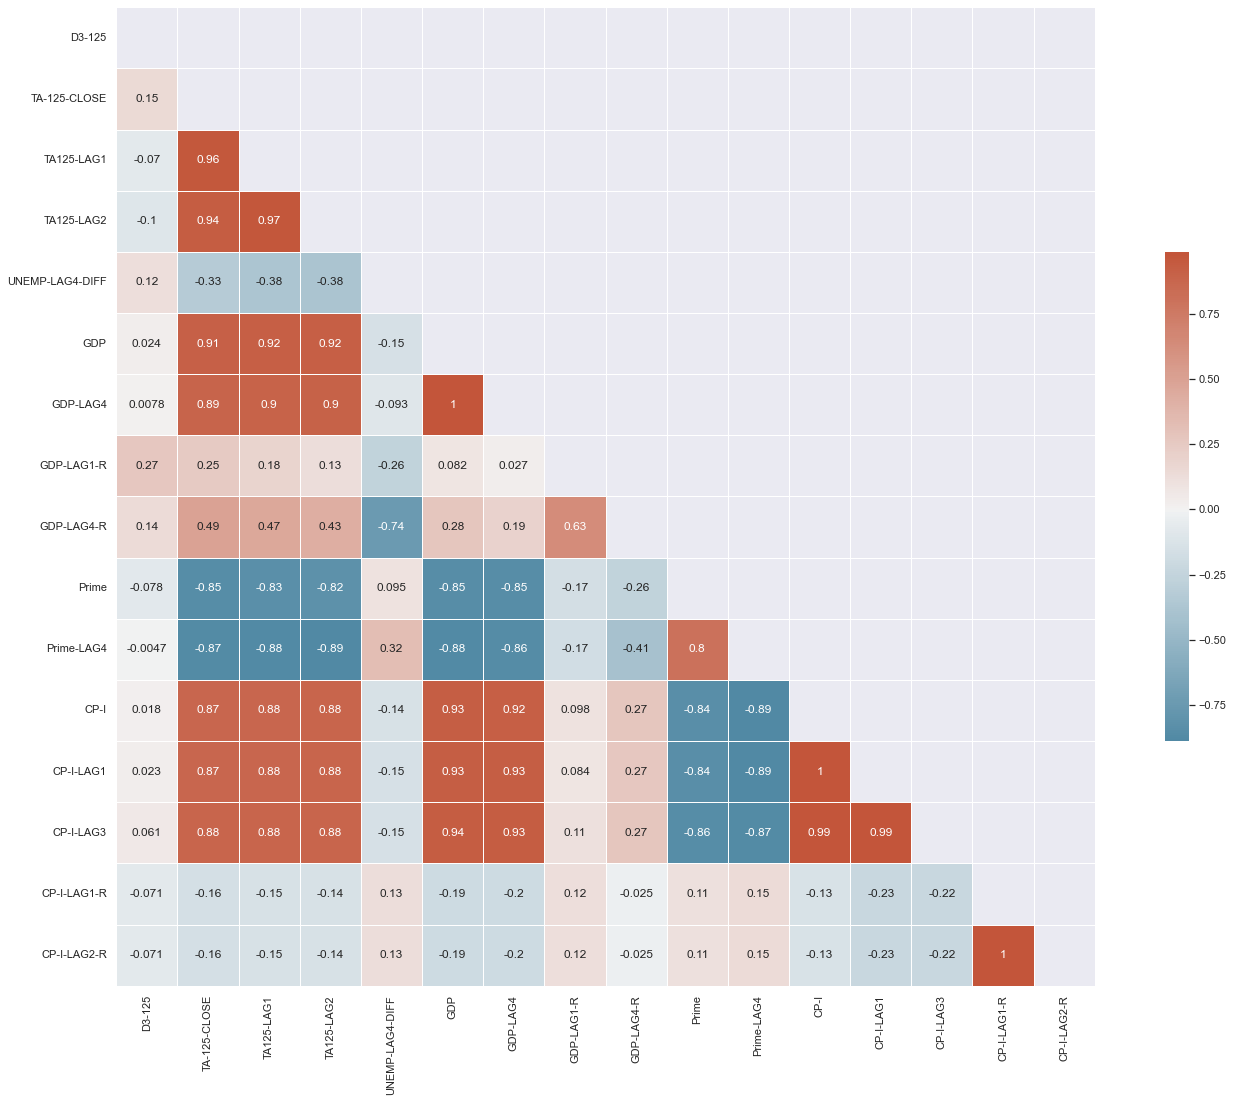

In [60]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z
corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [61]:
x_columns.remove('CP-I-LAG3')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     68.88
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.47e-31
Time:                        22:46:38   Log-Likelihood:                 376.86
No. Observations:                  75   AIC:                            -723.7
Df Residuals:                      60   BIC:                            -689.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0817      0.008     

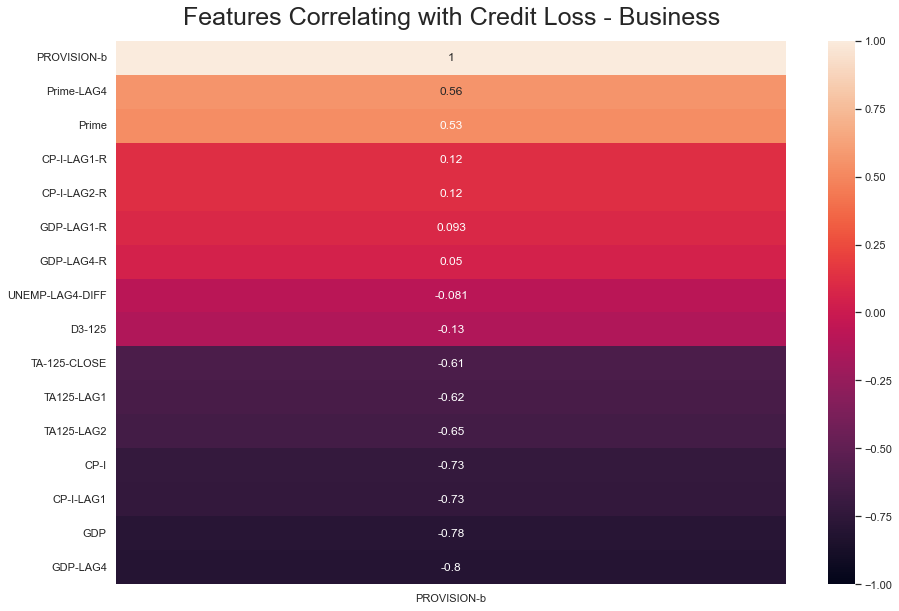

In [62]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z

sns.set(rc={'figure.figsize': (15, 10)})
heatmap = sns.heatmap(z.corr()[['PROVISION-b']].sort_values(by='PROVISION-b', ascending=False), vmin=-1, vmax=1,
                      annot=True)
heatmap.set_title('Features Correlating with Credit Loss - Business', fontdict={'fontsize': 25}, pad=16)
plt.yticks(rotation=0)
plt.show()

In [63]:
x_columns.remove('UNEMP-LAG4-DIFF')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     70.09
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.32e-31
Time:                        22:46:39   Log-Likelihood:                 374.28
No. Observations:                  75   AIC:                            -720.6
Df Residuals:                      61   BIC:                            -688.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0786      0.008      9.614   

In [64]:
x_columns.remove('GDP-LAG1-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     73.87
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           5.14e-32
Time:                        22:46:39   Log-Likelihood:                 372.75
No. Observations:                  75   AIC:                            -719.5
Df Residuals:                      62   BIC:                            -689.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0782      0.008      9.459   

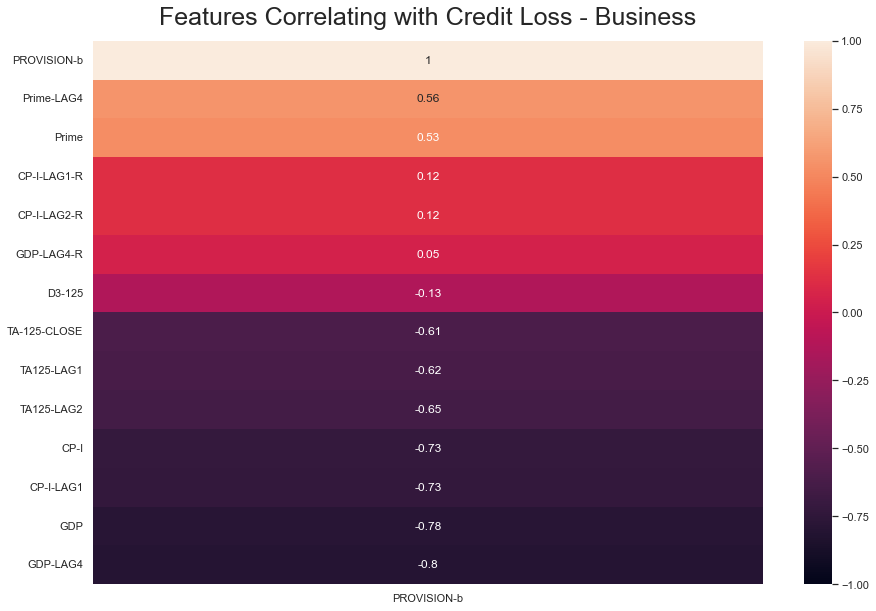

In [65]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z

sns.set(rc={'figure.figsize': (15, 10)})
heatmap = sns.heatmap(z.corr()[['PROVISION-b']].sort_values(by='PROVISION-b', ascending=False), vmin=-1, vmax=1,
                      annot=True)
heatmap.set_title('Features Correlating with Credit Loss - Business', fontdict={'fontsize': 25}, pad=16)
plt.yticks(rotation=0)
plt.show()

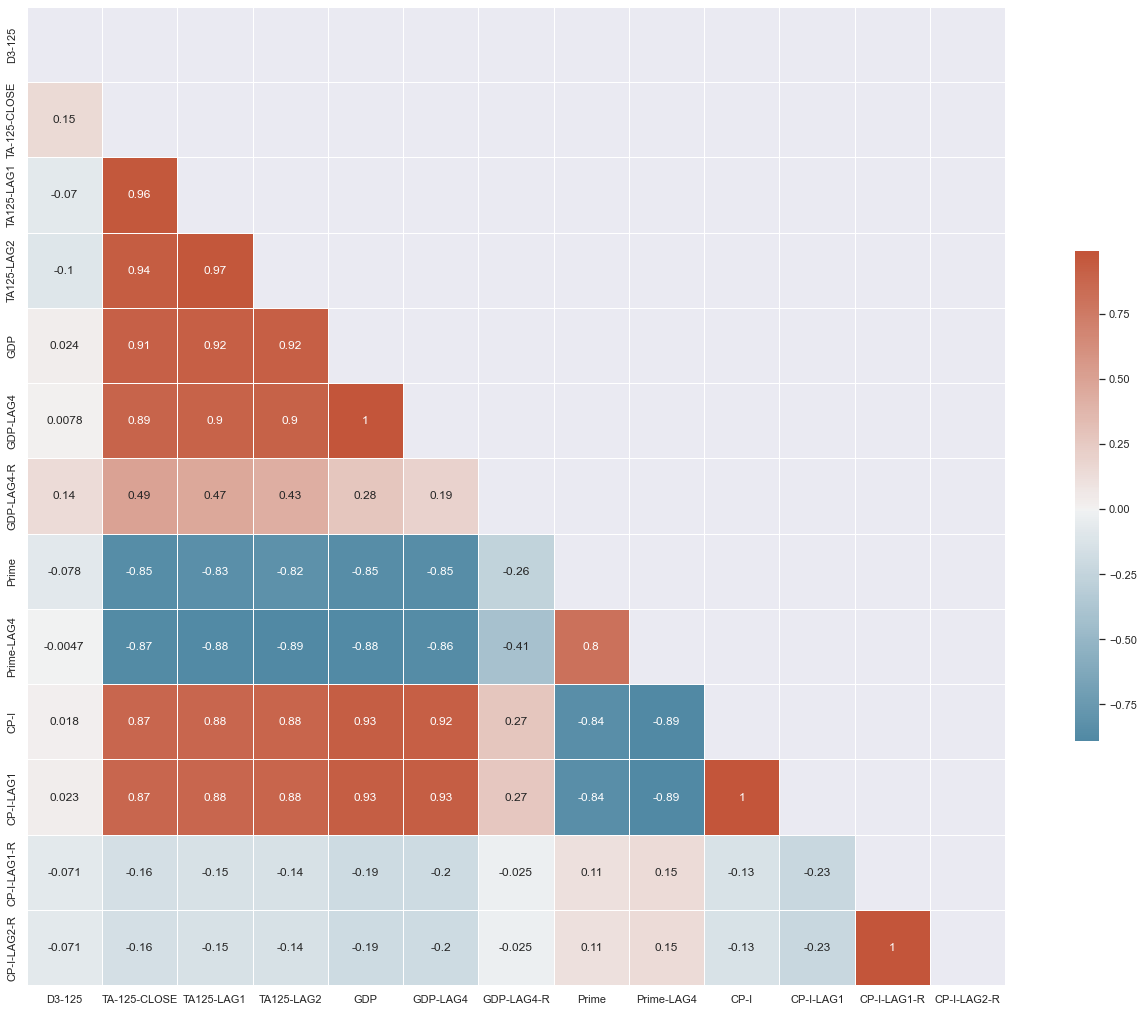

In [66]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z
corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [67]:
x_columns.remove('TA-125-CLOSE')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     56.72
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.09e-28
Time:                        22:46:40   Log-Likelihood:                 360.05
No. Observations:                  75   AIC:                            -696.1
Df Residuals:                      63   BIC:                            -668.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0817      0.010      8.439      

In [68]:
x_columns.remove('TA125-LAG1')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     63.23
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.74e-29
Time:                        22:46:40   Log-Likelihood:                 359.97
No. Observations:                  75   AIC:                            -697.9
Df Residuals:                      64   BIC:                            -672.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0822      0.010      8.610      

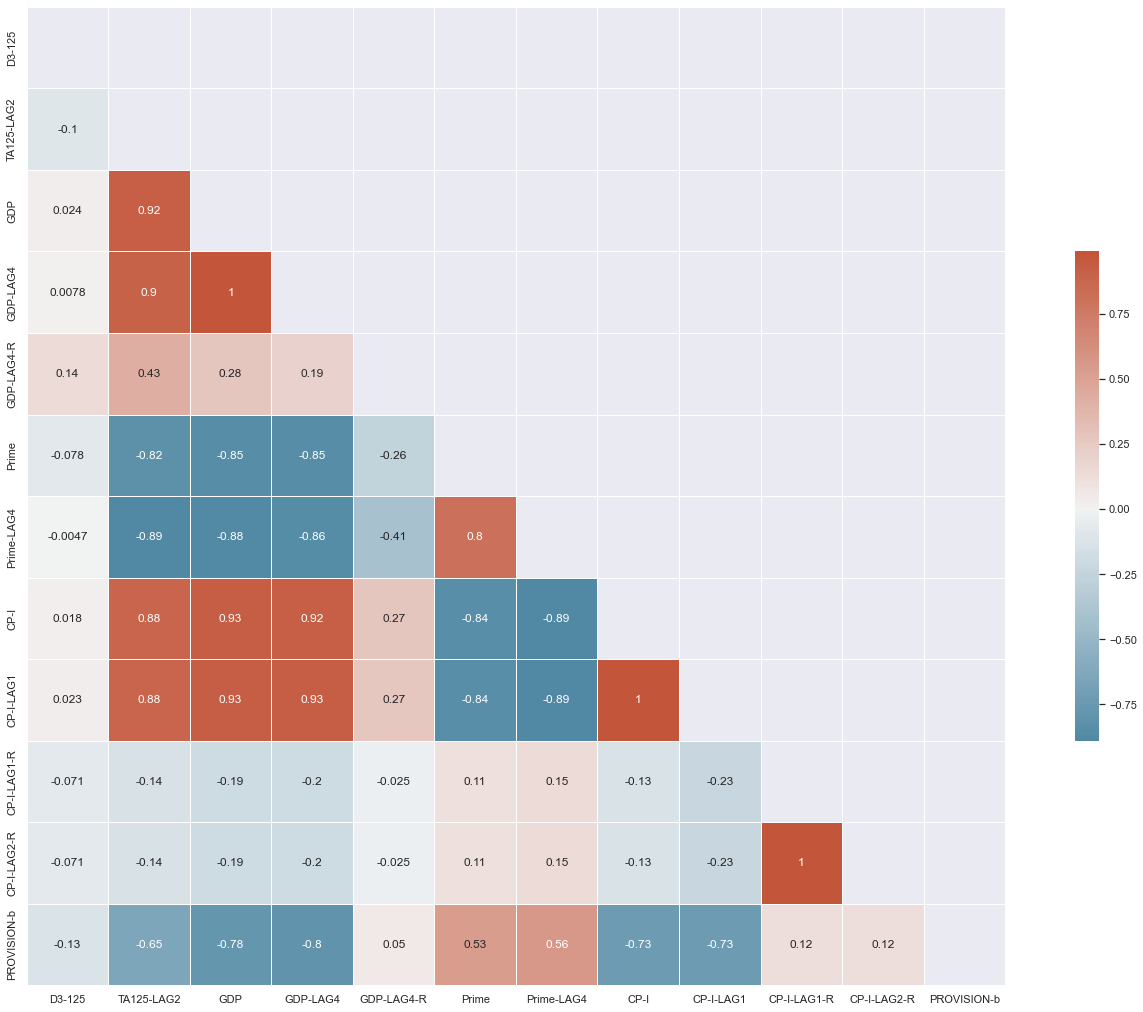

In [69]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z
corr = z.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [70]:
x_columns.remove('TA125-LAG2')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     59.65
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           5.57e-28
Time:                        22:46:41   Log-Likelihood:                 353.92
No. Observations:                  75   AIC:                            -687.8
Df Residuals:                      65   BIC:                            -664.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0880      0.010      8.722      

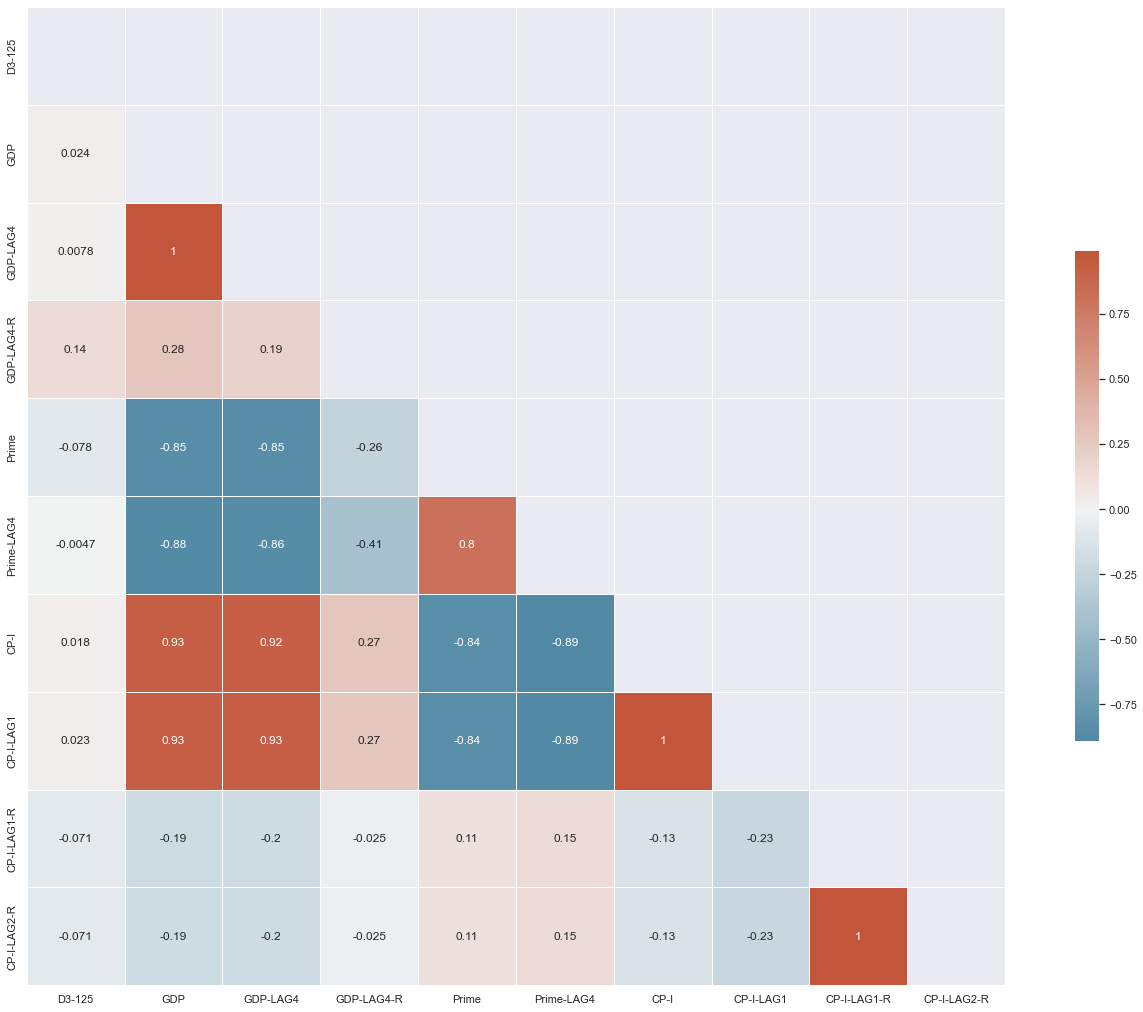

In [71]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z
corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [72]:
x_columns.remove('GDP')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     41.35
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           8.22e-23
Time:                        22:46:41   Log-Likelihood:                 337.73
No. Observations:                  75   AIC:                            -657.5
Df Residuals:                      66   BIC:                            -636.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1123      0.011      9.884      

In [73]:
x_columns.remove('GDP-LAG4-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     46.04
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.53e-23
Time:                        22:46:41   Log-Likelihood:                 336.44
No. Observations:                  75   AIC:                            -656.9
Df Residuals:                      67   BIC:                            -638.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1170      0.011     10.616      

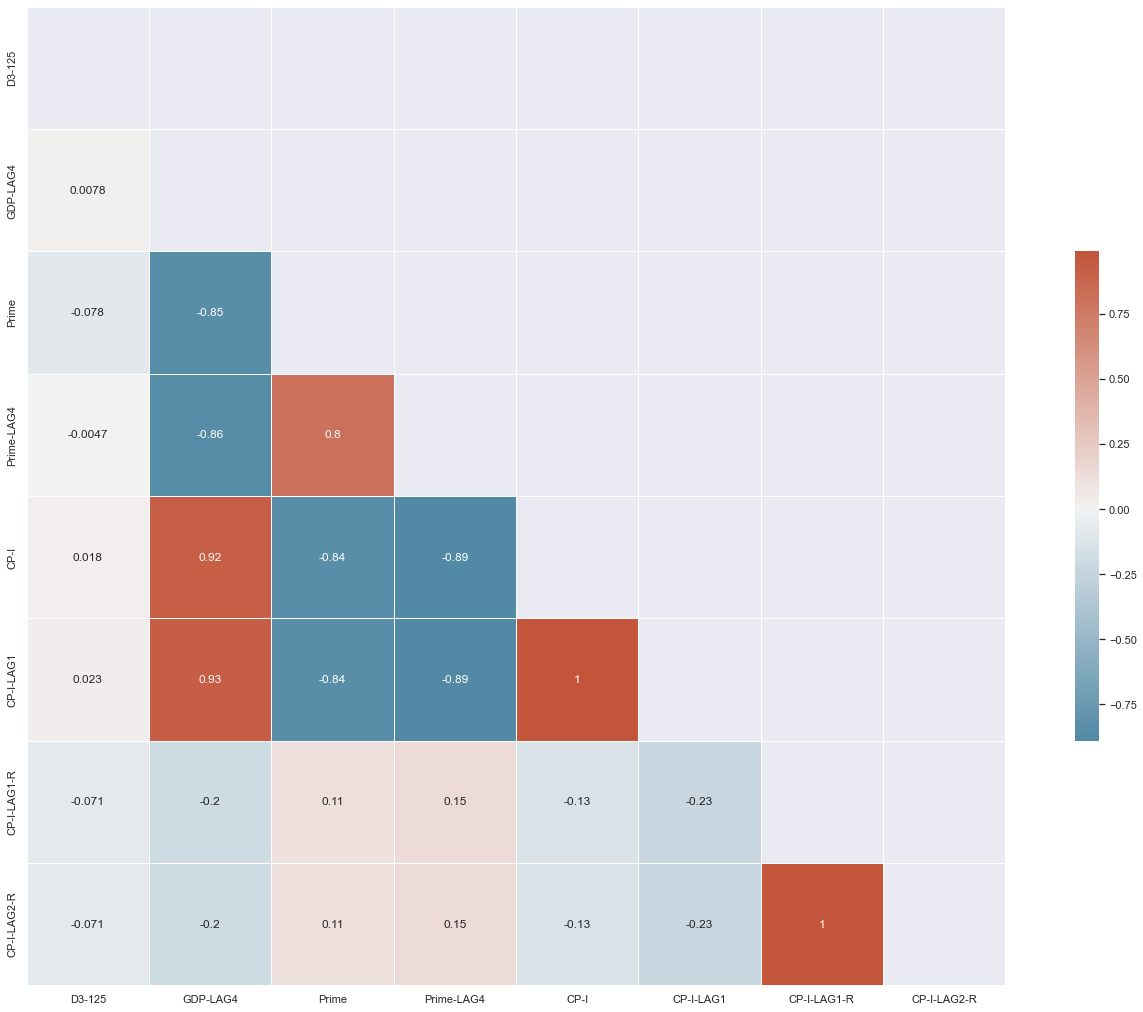

In [74]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z
corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [75]:
x_columns.remove('CP-I-LAG1-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     46.04
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.53e-23
Time:                        22:46:42   Log-Likelihood:                 336.44
No. Observations:                  75   AIC:                            -656.9
Df Residuals:                      67   BIC:                            -638.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1170      0.011     10.616      

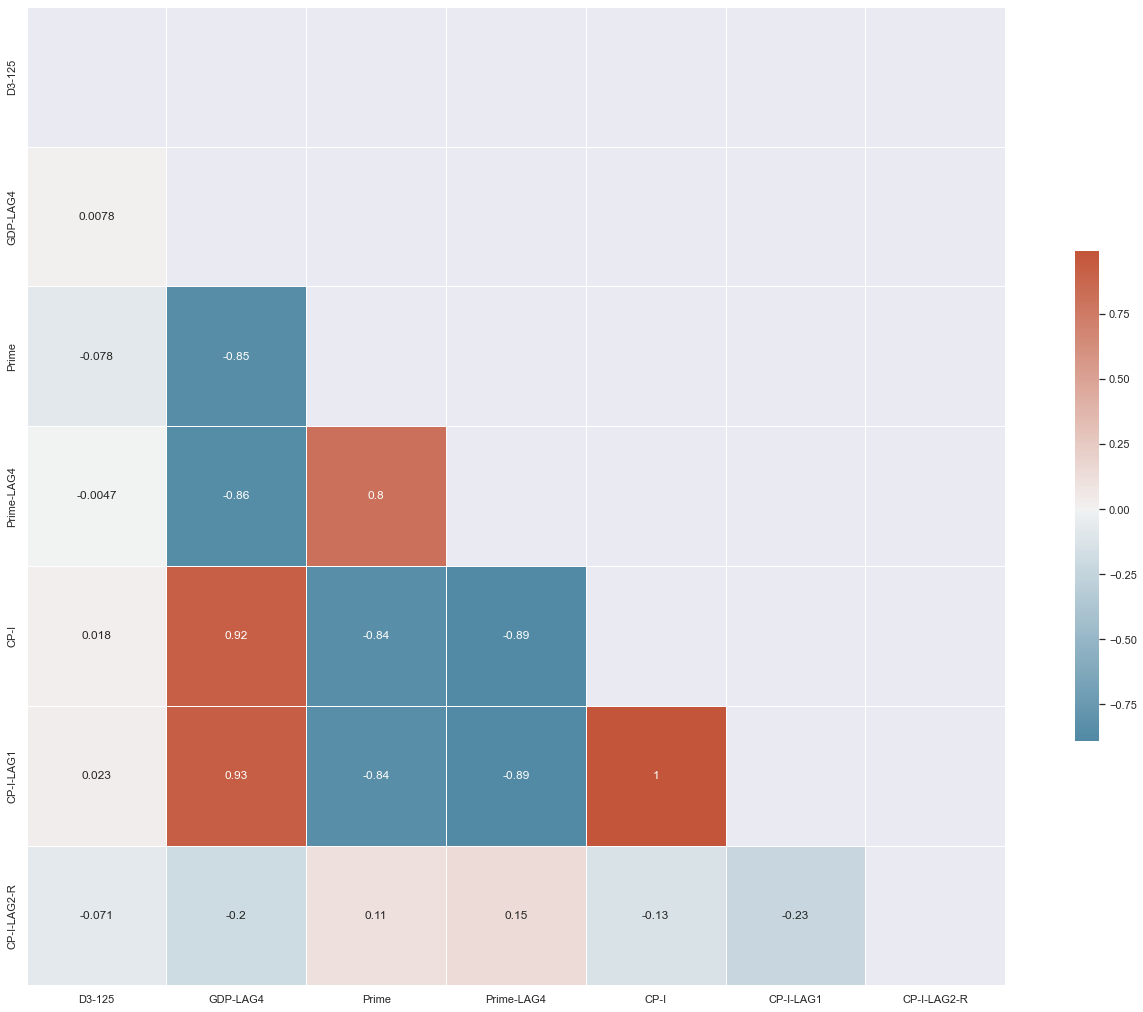

In [76]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z
corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [77]:
x_columns.remove('CP-I-LAG1')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     43.98
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.58e-21
Time:                        22:46:42   Log-Likelihood:                 329.91
No. Observations:                  75   AIC:                            -645.8
Df Residuals:                      68   BIC:                            -629.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1082      0.012      9.300      

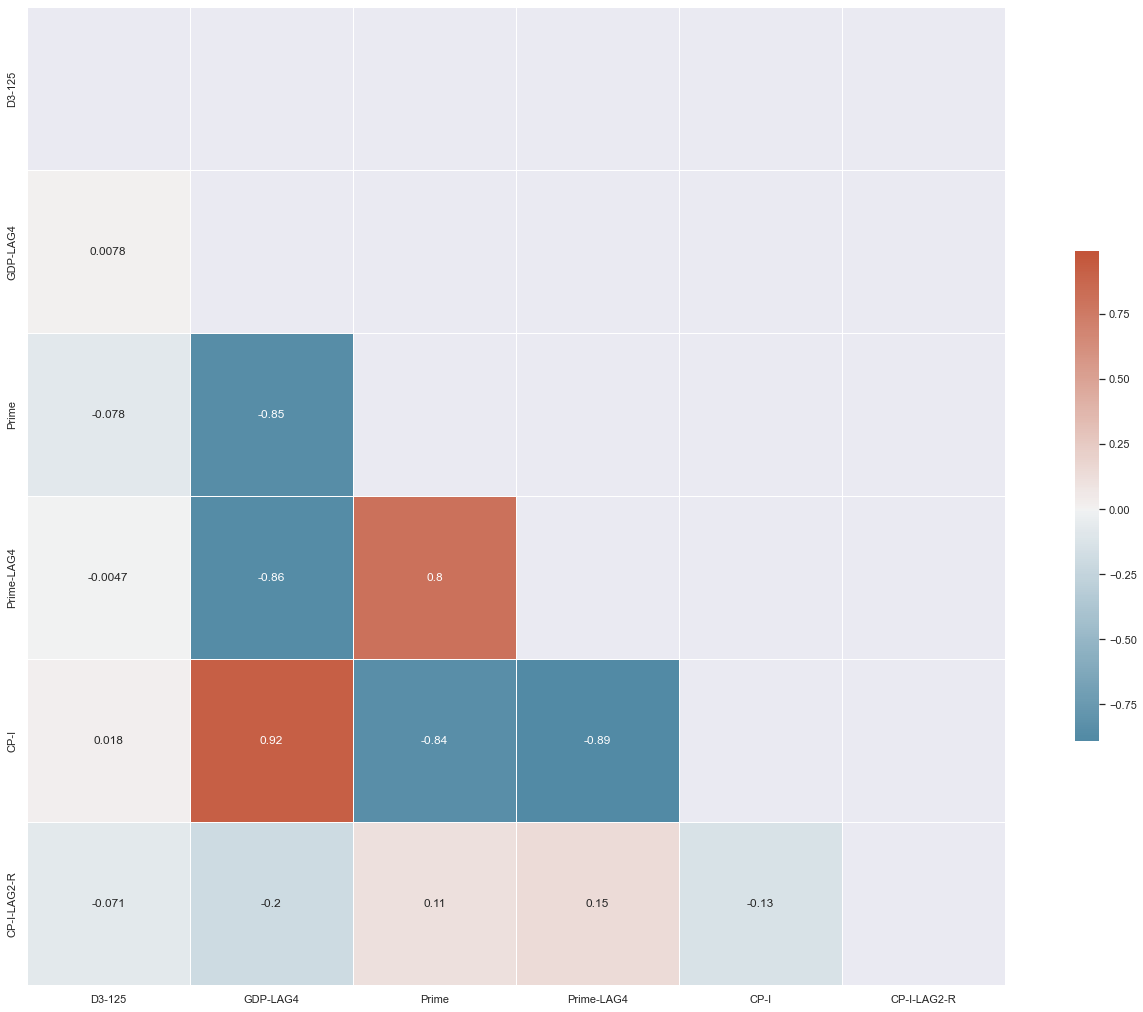

In [78]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z
corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [79]:
x_columns.remove('Prime')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     35.89
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           6.41e-18
Time:                        22:46:43   Log-Likelihood:                 318.50
No. Observations:                  75   AIC:                            -625.0
Df Residuals:                      69   BIC:                            -611.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0842      0.012      6.897      

In [80]:
x_columns.remove('CP-I')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     43.44
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.81e-18
Time:                        22:46:43   Log-Likelihood:                 317.25
No. Observations:                  75   AIC:                            -624.5
Df Residuals:                      70   BIC:                            -612.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0674      0.005     12.616      

In [81]:
x_columns.remove('CP-I-LAG2-R')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     57.89
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.85e-19
Time:                        22:46:43   Log-Likelihood:                 316.85
No. Observations:                  75   AIC:                            -625.7
Df Residuals:                      71   BIC:                            -616.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0667      0.005     12.654      0.0

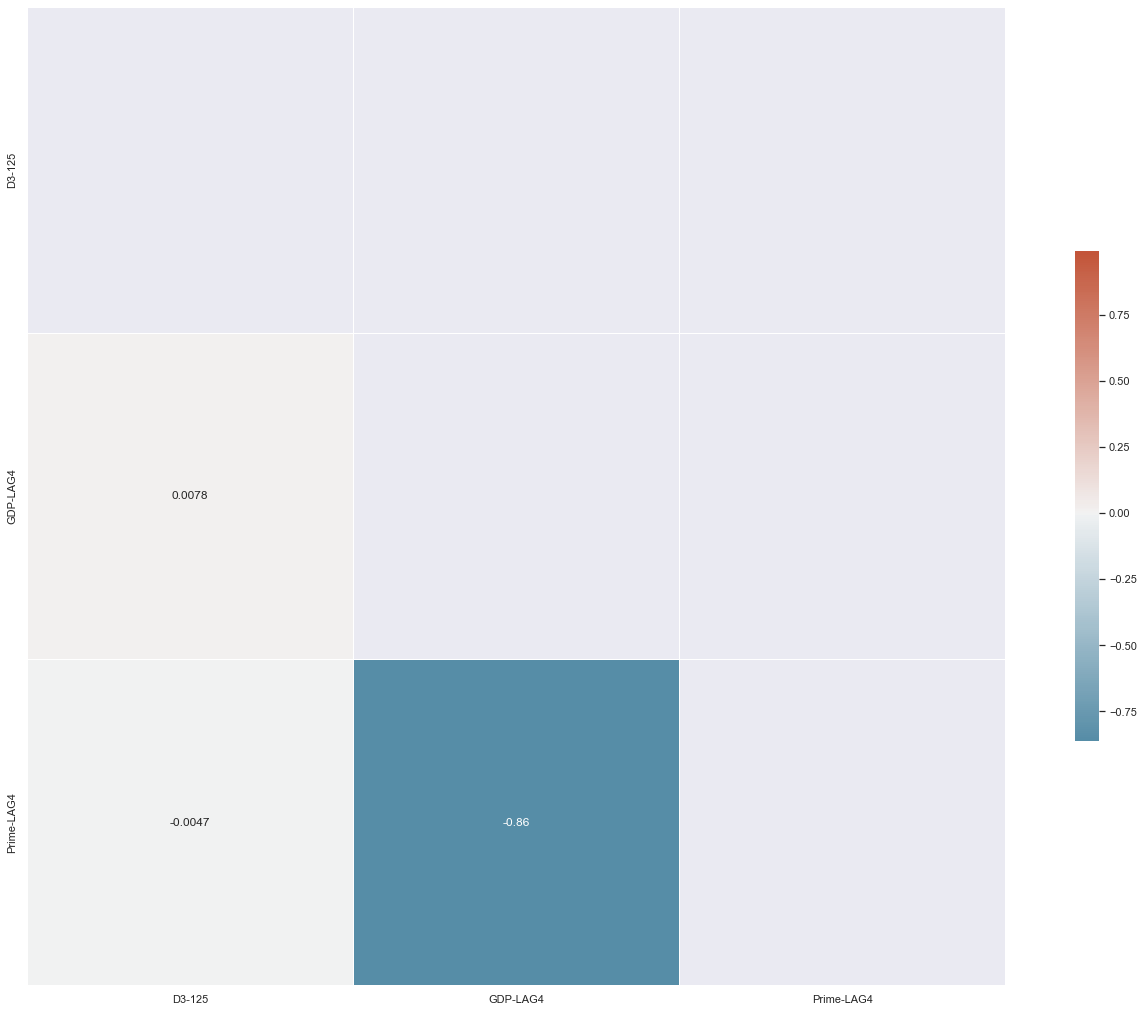

In [82]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z
corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [83]:
x_columns.remove('Prime-LAG4')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     66.79
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.96e-17
Time:                        22:46:43   Log-Likelihood:                 309.80
No. Observations:                  75   AIC:                            -613.6
Df Residuals:                      72   BIC:                            -606.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0481      0.002     21.198      0.0

In [84]:
x_columns.append('Dummy-t')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     58.28
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.08e-19
Time:                        22:46:43   Log-Likelihood:                 317.04
No. Observations:                  75   AIC:                            -626.1
Df Residuals:                      71   BIC:                            -616.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0517      0.002     22.765      0.0

In [85]:
x_columns.remove('GDP-LAG4')
x_columns.append('UNEMP-LAG3')
set_lr()

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     57.64
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           5.41e-19
Time:                        22:46:43   Log-Likelihood:                 316.74
No. Observations:                  75   AIC:                            -625.5
Df Residuals:                      71   BIC:                            -616.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0074      0.001      5.779      0.0

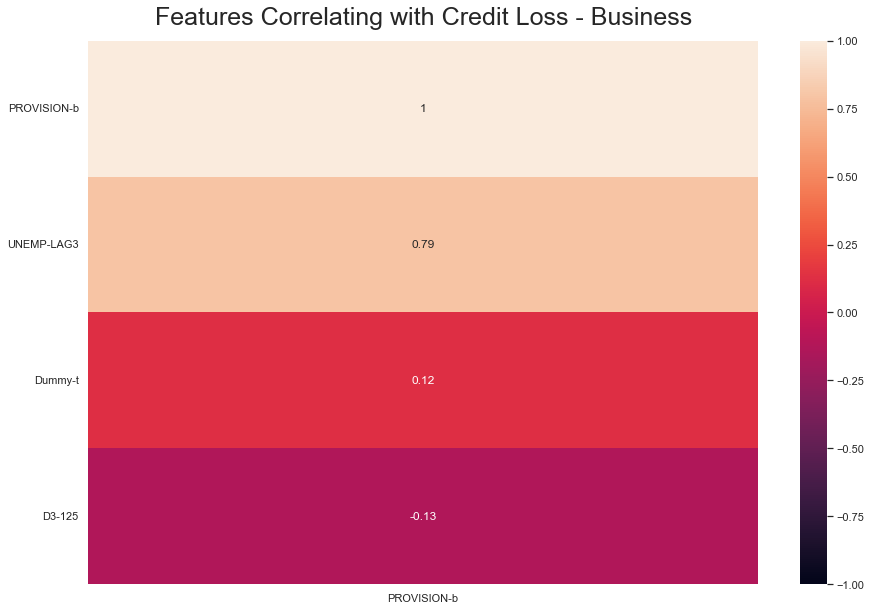

In [86]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z

sns.set(rc={'figure.figsize':(15,10)})
heatmap = sns.heatmap(z.corr()[['PROVISION-b']].sort_values(by='PROVISION-b', ascending=False), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Credit Loss - Business', fontdict={'fontsize':25}, pad=16)
plt.yticks(rotation=0)
plt.show()

In [87]:
x = df[x_columns]
y = y_provision
result = sm.OLS(y,x).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:            PROVISION-b   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              732.3
Date:                Sat, 07 Jan 2023   Prob (F-statistic):                    7.62e-54
Time:                        22:46:43   Log-Likelihood:                          302.28
No. Observations:                  75   AIC:                                     -598.6
Df Residuals:                      72   BIC:                                     -591.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

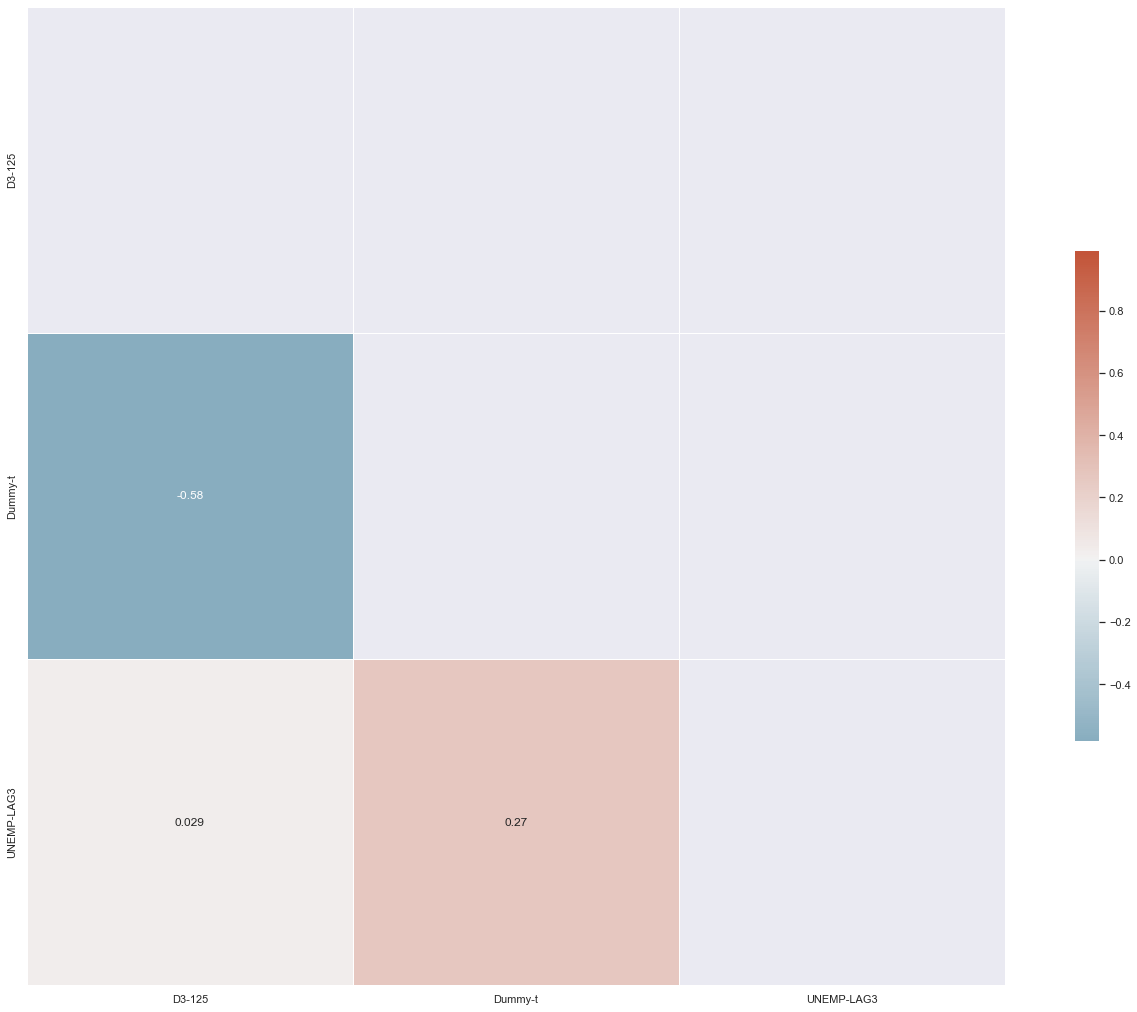

In [88]:
x = df[x_columns]
z = pd.concat([x, y_provision], axis=1, join='inner')
z
corr = x.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(25, 18))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# END

# Test the model

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
df_train, df_test = train_test_split(df, test_size = 0.2 , random_state=0)

In [91]:
x = df_train[["D3-125","UNEMP-LAG3","Dummy-t"]]
y = df_train["PROVISION-b"]

In [92]:
x = sm.add_constant(x)

In [93]:
linear = sm.OLS(y,x)
result = linear.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     43.98
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           9.67e-15
Time:                        22:46:44   Log-Likelihood:                 251.36
No. Observations:                  60   AIC:                            -494.7
Df Residuals:                      56   BIC:                            -486.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0080      0.001      5.548      0.0

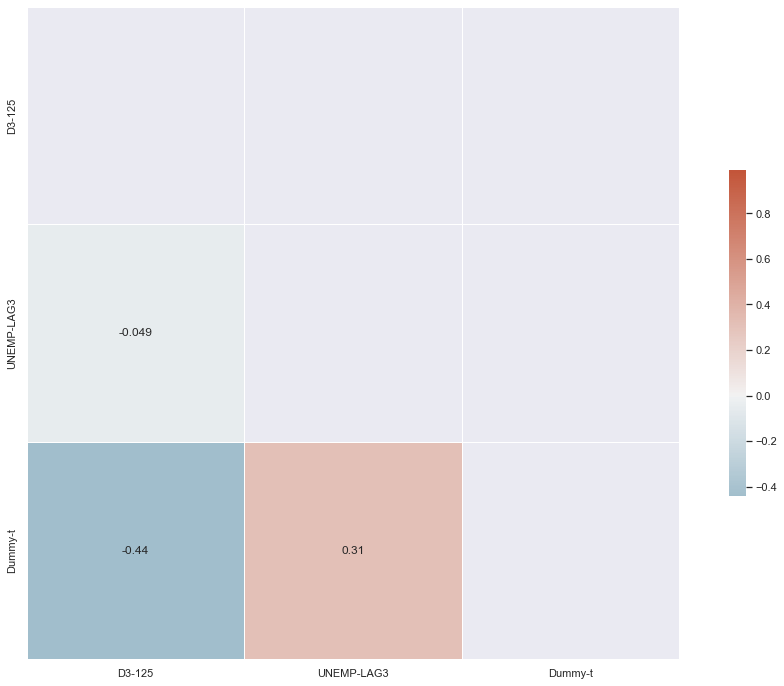

In [94]:
x1 = df_train[["D3-125","UNEMP-LAG3","Dummy-t"]]


corr = x1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [95]:
test = df_test[["D3-125","UNEMP-LAG3","Dummy-t"]]
test = sm.add_constant(test)
predict = pd.DataFrame()
predict["Real"] = df_test["PROVISION-b"].astype(float)
predict["predict"] = result.predict(test)
predict["Gap"] = predict["Real"] - predict["predict"]
predict

,Real,predict,Gap
62,0.017205,0.018538,-0.001333
67,0.018109,0.019638,-0.001529
32,0.029511,0.027645,0.001866
84,0.019475,0.018562,0.000913
38,0.029321,0.025165,0.004156
36,0.026068,0.027145,-0.001077
76,0.014183,0.016051,-0.001868
64,0.017351,0.018915,-0.001564
44,0.030973,0.026328,0.004645
17,0.027868,0.026411,0.001457


In [96]:
print(predict["Gap"].mean())
print(predict["Gap"].std())

8.123092966370906e-05
0.0031573485740055275


eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


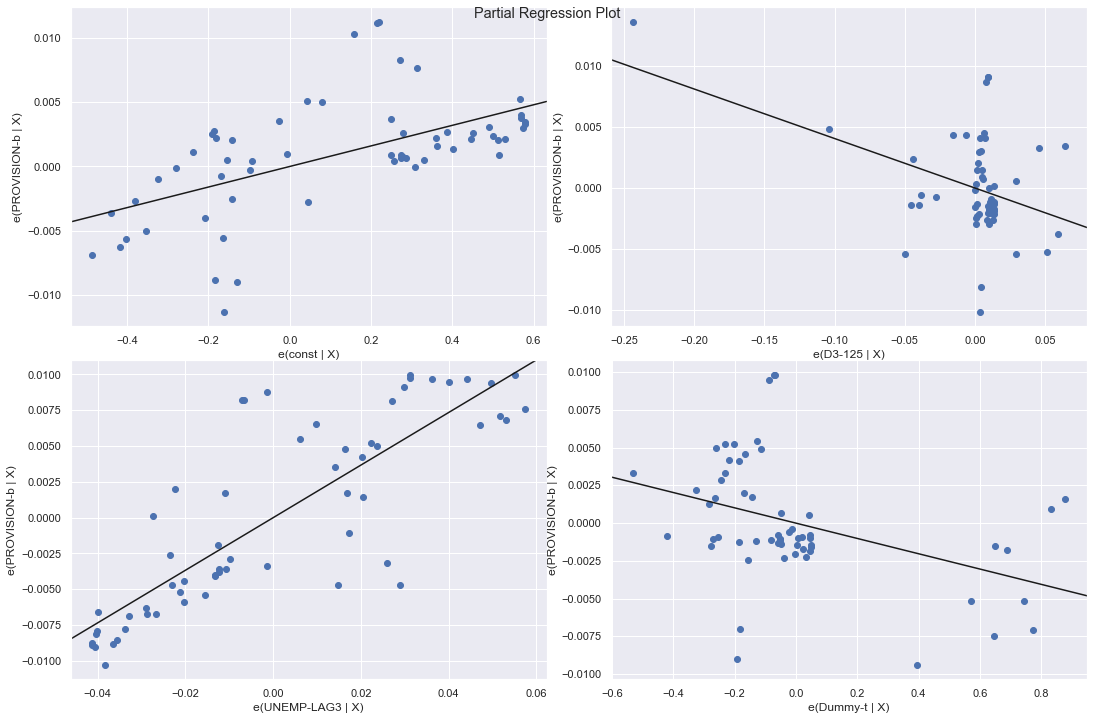

In [97]:
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout(pad=0.01)

In [98]:
# Show all the points on graph

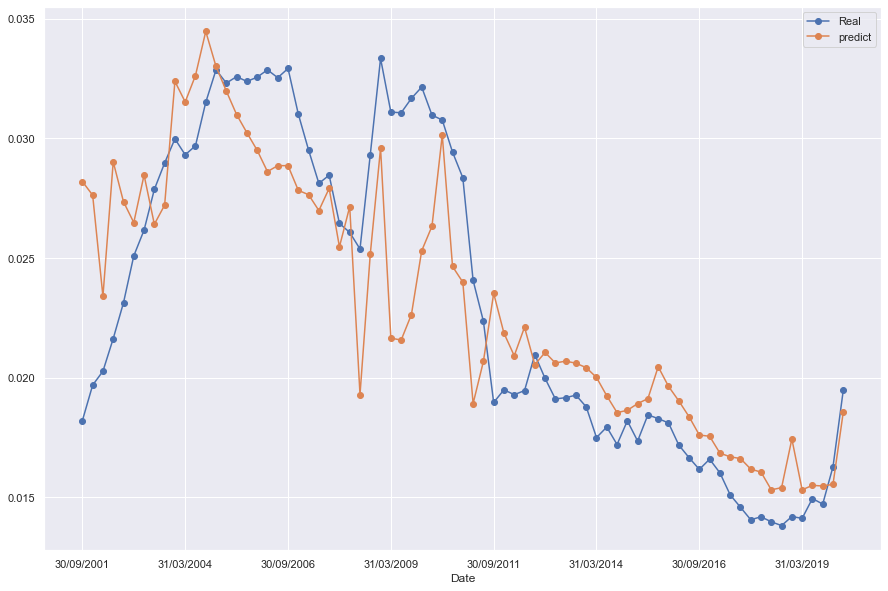

In [99]:
display = df[["D3-125", "UNEMP-LAG3", "Dummy-t"]]
display = sm.add_constant(display)
show_point = pd.DataFrame()
show_point["Date"] = df["Index"]
show_point["Real"] = df["PROVISION-b"].astype(float)
show_point["predict"] = result.predict(display)
show_point["Gap"] = show_point["Real"] - show_point["predict"]

check1 = show_point.reset_index()
check1.plot(x="Date", y=["Real", "predict"], marker="o")
plt.show()

### END

In [100]:
# after conversion with lior, he recommended to build the model between 2006-2019

In [101]:
df = pd.read_csv('C:\project\max\Database\QA_macro_model_database_business_sector.csv')
df

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,...,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,CB-LENSER-S-b,CB-LENSER-S-p,CB-BORRWER-S-b,CB-BORRWER-S-p,PROVISION-b,PROVISION-p,Dummy-t
0,31/03/1999,Mar-99,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,223.893274,NaN,227.748440,NaN,0.016927,NaN,0.0
1,30/06/1999,Jun-99,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,232.440980,NaN,236.259222,NaN,0.016161,NaN,0.0
2,30/09/1999,Sep-99,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012405,NaN,NaN,246.492654,NaN,250.444615,NaN,0.015780,NaN,0.0
3,31/12/1999,Dec-99,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.004713,0.027965,NaN,258.887479,57.490091,263.019634,58.475290,0.015710,0.016848,0.0
4,31/03/2000,03/00,NaN,0.0,NaN,516.55,NaN,NaN,NaN,NaN,...,-0.012195,0.004771,0.015429,265.435111,58.442553,269.500308,59.522897,0.015084,0.018150,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,30/06/2021,Jun-21,NaN,0.0,0.060400,1764.58,1664.07,1568.09,1345.44,1325.23,...,0.007952,0.016026,0.017042,508.189897,145.994290,518.439616,148.789346,0.019770,0.018785,0.0
90,30/09/2021,Sep-21,NaN,0.0,0.053894,1859.68,1764.58,1664.07,1568.09,1345.44,...,0.008876,0.025044,0.025044,530.079225,147.395312,539.793030,150.045330,0.017995,0.017661,0.0
91,31/12/2021,Dec-21,NaN,0.0,0.105841,2056.51,1859.68,1764.58,1664.07,1568.09,...,0.002933,0.019881,0.028050,566.332249,150.954947,575.940853,153.558852,0.016683,0.016957,0.0
92,31/03/2022,Mar-22,NaN,0.0,0.019742,2097.11,2056.51,1859.68,1764.58,1664.07,...,0.014620,0.026627,0.034791,597.156897,152.417201,607.552634,155.343450,0.017111,0.018837,0.0


In [102]:
# Cutting relevant rows
df = df[28:85]
df

,Index,Quarter,TA125,D3-125,P-CHANGE125,TA-125-CLOSE,TA125-LAG1,TA125-LAG2,TA125-LAG3,TA125-LAG4,...,CP-I-LAG2-R,CP-I-LAG3-R,CP-I-LAG4-R,CB-LENSER-S-b,CB-LENSER-S-p,CB-BORRWER-S-b,CB-BORRWER-S-p,PROVISION-b,PROVISION-p,Dummy-t
28,31/03/2006,03-Jun,847.800500,0.00,0.015541,835.78,822.99,753.59,656.48,664.64,...,0.005825,0.024728,0.036000,333.397101,77.114710,344.726192,78.637537,0.032864,0.019365,0.0
29,30/06/2006,06-Jun,829.559000,-0.02,-0.050504,793.57,835.78,822.99,753.59,656.48,...,0.009653,0.020488,0.034619,332.562277,78.261130,343.746241,79.841340,0.032536,0.019792,0.0
30,30/09/2006,09-Jun,820.465263,-0.01,0.066182,846.09,793.57,835.78,822.99,753.59,...,-0.007648,0.007767,0.012683,330.409572,80.969207,341.657383,82.526306,0.032921,0.018868,0.0
31,31/12/2006,12-Jun,937.406191,0.00,0.089352,921.69,846.09,793.57,835.78,822.99,...,-0.008671,-0.006757,-0.000971,332.185029,79.452583,342.817805,81.264510,0.031016,0.022297,0.0
32,31/03/2007,03-Jul,968.919500,0.00,0.078996,994.50,921.69,846.09,793.57,835.78,...,-0.002350,-0.018564,-0.009091,342.702015,77.213309,353.123064,79.030840,0.029511,0.022998,0.0
33,30/06/2007,06-Jul,1109.842500,0.00,0.108286,1102.19,994.50,921.69,846.09,793.57,...,0.012133,0.001000,-0.006656,348.395512,82.832434,358.475432,84.755282,0.028119,0.022687,0.0
34,30/09/2007,09-Jul,1053.438235,-0.05,0.007313,1110.25,1102.19,994.50,921.69,846.09,...,0.012987,0.022869,0.014000,346.844789,85.996872,357.005326,88.018124,0.028460,0.022964,0.0
35,31/12/2007,12-Jul,1152.259545,0.00,0.039937,1154.59,1110.25,1102.19,994.50,921.69,...,0.010848,0.036400,0.033965,354.989819,91.582616,364.632889,93.802836,0.026446,0.023669,0.0
36,31/03/2008,03-Aug,953.973636,-0.17,-0.196200,928.06,1154.59,1110.25,1102.19,994.50,...,0.000976,0.024975,0.037412,360.830640,92.717358,370.488492,95.022236,0.026068,0.024256,1.0
37,30/06/2008,06-Aug,1021.460526,0.00,0.064058,987.51,928.06,1154.59,1110.25,1102.19,...,0.022417,0.034517,0.047952,370.637397,95.625100,380.287945,98.042762,0.025377,0.024659,1.0


In [103]:
df = df.drop(labels= ['CB-LENSER-S-b','CB-LENSER-S-p','CB-BORRWER-S-b','CB-BORRWER-S-p','PROVISION-p'], axis= 1)

In [104]:
len(df)

57

In [105]:
x_var = df.iloc[:,2 :-2]
y_provision = df.iloc[:,-2 :-1]
x = x_var

In [106]:
x_columns = ['UNEMP', 'GDP-LAG4-R','CP-I-LAG3-R']

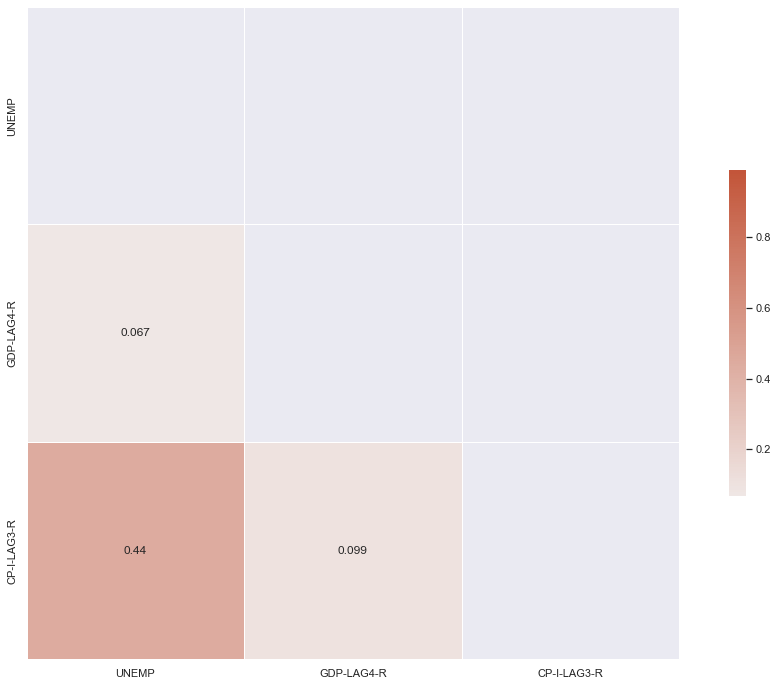

In [107]:
c = df[x_columns]

corr = c.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.99, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [108]:
x = df[x_columns]
x = sm.add_constant(x)
result = sm.OLS(y_provision,x).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            PROVISION-b   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     153.5
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           4.08e-26
Time:                        22:46:47   Log-Likelihood:                 271.07
No. Observations:                  57   AIC:                            -534.1
Df Residuals:                      53   BIC:                            -526.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0047      0.001      4.057      

In [132]:
#x = df[x_columns]
#x = sm.add_constant(x)
predict = pd.DataFrame()
predict["Real"] = df["PROVISION-b"].astype(float)
predict["predict"] = result.predict(x)
predict["Absolut_Error"] = abs(predict["predict"]-predict["Real"])
predict["Square_Error"] = (predict["predict"]-predict["Real"])**2

predict

,Real,predict,Absolut_Error,Square_Error
28,0.032864,0.033644,0.000780,6.077019e-07
29,0.032536,0.032729,0.000193,3.718309e-08
30,0.032921,0.031680,0.001241,1.541166e-06
31,0.031016,0.029276,0.001740,3.026507e-06
32,0.029511,0.027675,0.001836,3.370731e-06
33,0.028119,0.028839,0.000720,5.181192e-07
34,0.028460,0.027800,0.000660,4.361822e-07
35,0.026446,0.027135,0.000689,4.743860e-07
36,0.026068,0.024993,0.001075,1.155337e-06
37,0.025377,0.025566,0.000189,3.579185e-08


In [133]:
print(predict["Absolut_Error"].mean())

0.0015904308605161406


In [134]:
print(predict["Square_Error"].mean())

4.3334002644866916e-06
